In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import SIPKSEvolve as sip
from utils import reparameterize
from tqdm import tqdm


In [2]:
# evolve (adapt dt)
# system parameters
L_full = 14*10.0   # system size
Drho = 0.1      # fixed
Dc = 1.0        # fixed 
T = 5.0         # fixed
epsilon = 1e-1  # important
KS_params = (Drho, Dc, T, epsilon)
r = 1e-2        # important
lbd_spl = 15.0  # important
kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)
lbd_max = -1 / k * np.log(eps / k / kappa)
print(f'Emerging scales: {lbd_spl/2 = :.2f}, argmax v_M = {lbd_max:.2f}, {lbd_spl = :.2f}')

# # evolution parameters
n_steps = 100_000
dt = 1e2
print(f'Evolving on [0, {n_steps * dt:.0e}] with {dt = }, saving {n_steps} sample points. ')

Nmax = 20#int(2 * L_full / lbd_max)
for i in range(50):
        seed = i * 1113 + 121212
        lbd_vect_ini, adj_matr_ini = sip.get_initial_state_chaos(
                Nmax, 
                L_full, 
                KS_params,
                r, 
                lbd_spl, 
                merge_threshold=1e-1, 
                boundary_condition='periodic', 
                seed=seed
        )

        t_range, lbd_vect_t, adj_matr_t = sip.evolve_adapt_timestep(
                lbd_vect_ini, 
                adj_matr_ini,
                KS_params,
                r, 
                lbd_spl, 
                n_steps, 
                dt,
                lbd_spl_hard=lbd_spl*1.5,
                merge_threshold=1e-1,
                save_states='grid', # can be 'grid', 'event', or 'end'
                verbose=False, 
                tqdm_bool=True, 
                maxiter=50_000, 
                seed=seed
        )
        print(i+1)
        np.savez(f'SIP_data/res_{i}.npz', t_range=t_range, lbd_vect_t=lbd_vect_t, adj_matr_t=adj_matr_t)

Emerging scales: lbd_spl/2 = 7.50, argmax v_M = 13.58, lbd_spl = 15.00
Evolving on [0, 1e+07] with dt = 100.0, saving 100000 sample points. 


Worst case timer:   0%|          | 0/50000 [00:00<?, ?it/s]/home/natan/.local/lib/python3.8/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
Worst case timer:   1%|          | 474/50000 [00:03<07:02, 117.24it/s]/home/natan/Documents/TMP/masters/workstation_copy/KS_data_analysis/peaks_analysis/SIPKSEvolve.py:305: RuntimeWarning: overflow encountered in exp
  return 0.5 * adj_matr @ (kappa * np.exp(-k * y) + eps * y)
Worst case timer:  55%|█████▍    | 27429/50000 [03:49<03:09, 119.29it/s]


1


Worst case timer:  54%|█████▎    | 26806/50000 [03:36<03:07, 123.98it/s]


2


Worst case timer:  52%|█████▏    | 26222/50000 [03:28<03:09, 125.53it/s]


3


Worst case timer:  53%|█████▎    | 26747/50000 [03:32<03:04, 125.75it/s]


4


Worst case timer:  54%|█████▎    | 26852/50000 [03:33<03:04, 125.51it/s]


5


Worst case timer:  54%|█████▍    | 27040/50000 [03:35<03:02, 125.67it/s]


6


Worst case timer:  51%|█████     | 25497/50000 [03:23<03:15, 125.29it/s]


7


Worst case timer:  54%|█████▍    | 26899/50000 [03:33<03:03, 125.70it/s]


8


Worst case timer:  53%|█████▎    | 26627/50000 [03:32<03:06, 125.47it/s]


9


Worst case timer:  55%|█████▍    | 27446/50000 [03:38<02:59, 125.62it/s]


10


Worst case timer:  53%|█████▎    | 26286/50000 [03:29<03:08, 125.51it/s]


11


Worst case timer:  53%|█████▎    | 26695/50000 [03:32<03:05, 125.45it/s]


12


Worst case timer:   0%|          | 2/50000 [00:00<32:51, 25.37it/s]


ValueError: Solver failed. Message: Required step size is less than spacing between numbers..

In [110]:
tmaxs = np.zeros(6)
for i in range(6):
    file = np.load(f'SIP_data/res_{i}.npz')
    lbd_vect_t = file['lbd_vect_t']
    t_range = file['t_range']
    n_nonzero = np.sum(lbd_vect_t > 0, axis=0)
    tmax = np.max(np.where(np.diff(n_nonzero) != 0)[0])
    tmaxs[i] = tmax

In [111]:
_ , ax = plt.subplots()
ax.hist(tmaxs, bins=50)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.]),
 array([35996.  , 37275.86, 38555.72, 39835.58, 41115.44, 42395.3 ,
        43675.16, 44955.02, 46234.88, 47514.74, 48794.6 , 50074.46,
        51354.32, 52634.18, 53914.04, 55193.9 , 56473.76, 57753.62,
        59033.48, 60313.34, 61593.2 , 62873.06, 64152.92, 65432.78,
        66712.64, 67992.5 , 69272.36, 70552.22, 71832.08, 73111.94,
        74391.8 , 75671.66, 76951.52, 78231.38, 79511.24, 80791.1 ,
        82070.96, 83350.82, 84630.68, 85910.54, 87190.4 , 88470.26,
        89750.12, 91029.98, 92309.84, 93589.7 , 94869.56, 96149.42,
        97429.28, 98709.14, 99989.  ]),
 <BarContainer object of 50 artists>)

In [42]:
import numpy as np

def recover_permutation(L_shuffled):
    N = L_shuffled.shape[0]

    # Step 1: Identify non-zero patterns for each row
    row_patterns = [set(np.where(row != 0)[0]) for row in L_shuffled]

    # Step 2: Reconstruct row order
    row_order = [0]  # Start with the first row
    visited = set(row_order)

    while len(row_order) < N:
        current = row_order[-1]
        # Find the next connected row (not yet visited)
        for neighbor in row_patterns[current]:
            if neighbor not in visited:
                row_order.append(neighbor)
                visited.add(neighbor)
                break

    # Step 3: Construct permutation matrix P
    P = np.zeros((N, N), dtype=int)
    for i, j in enumerate(row_order):
        P[i, j] = 1

    return P


In [ ]:
L_shuffled = adj_matr_t[6].toarray()
mask = np.any(L_shuffled != 0, axis = 0)
L_shuffled = L_shuffled[mask, :][:, mask]
fig, ax = plt.subplots()
# ax.imshow(L_shuffled)
perm = recover_permutation(L_shuffled)
# ax.imshow(perm)
ax.imshow(perm @ L_shuffled @ perm.T)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
# plot solution 
fig, ax = plt.subplots()
# assert np.all(np.isclose(np.sum(lbd_vect_t, axis=0), L_full))
Nmax = np.shape(np.array(lbd_vect_t))[0]
for i in range(min(Nmax, 150)):
    # ax.plot(t_range, np.abs(lbd_vect_t[i, :]-lbd_vect_t[i, 0]))
    ax.plot(t_range[::1], np.array(lbd_vect_t)[i, ::1])
    # ax.plot(t_range, np.cumsum(lbd_vect_t, axis=0)[i, :])
# ax.plot(t_range, np.sum(lbd_vect_t, axis=0))
ax.grid()
# ax.set_xscale('log')
# ax.set_yscale('log')
print(len(np.where(np.any(lbd_vect_t > 0.001, axis = 1))[0]))
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

9


In [73]:
fig, ax = plt.subplots()
ax.hist(lbd_vect_t[lbd_vect_t>0], bins=30)
# ax.hist(lbd_vect_t[:,t_range>9e6].flatten(), bins=np.linspace(1,20,40))

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(array([8.0000e+00, 8.0000e+00, 1.0000e+01, 1.3000e+01, 4.0000e+01,
        5.3000e+01, 8.0000e+01, 1.9700e+02, 2.8700e+02, 4.5000e+02,
        7.9800e+02, 1.3390e+03, 2.7640e+03, 5.8890e+03, 1.3169e+04,
        4.1010e+03, 4.1880e+03, 6.5630e+03, 9.8260e+03, 1.7165e+04,
        3.2369e+04, 3.2907e+04, 3.4459e+04, 2.8410e+04, 3.1537e+04,
        3.0385e+04, 2.7705e+04, 3.1486e+04, 4.7109e+04, 5.3050e+04]),
 array([ 0.12719984,  0.62445129,  1.12170273,  1.61895418,  2.11620563,
         2.61345707,  3.11070852,  3.60795997,  4.10521141,  4.60246286,
         5.0997143 ,  5.59696575,  6.0942172 ,  6.59146864,  7.08872009,
         7.58597154,  8.08322298,  8.58047443,  9.07772588,  9.57497732,
        10.07222877, 10.56948022, 11.06673166, 11.56398311, 12.06123456,
        12.558486  , 13.05573745, 13.5529889 , 14.05024034, 14.54749179,
        15.04474324]),
 <BarContainer object of 30 artists>)

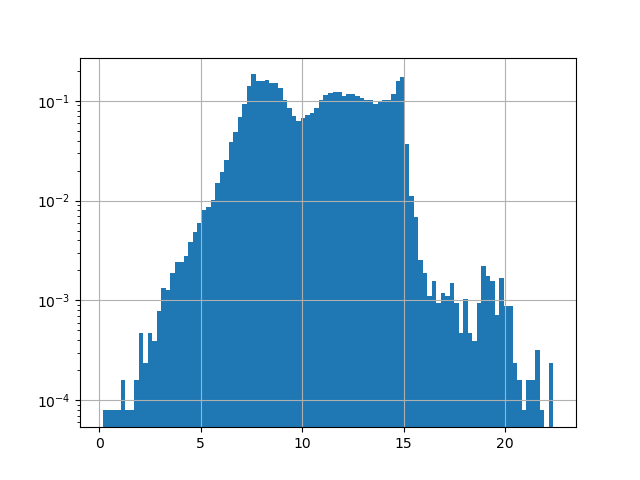

In [ ]:
fig, ax = plt.subplots()

stride = len(t_range)
for i in range(len(t_range)//stride):
    ax.hist(lbd_vect_t[:,i*stride:(i+1)*stride][lbd_vect_t[:,i*stride:(i+1)*stride]>0], bins = 100, density=True, bottom=i)

ax.grid()
# ax.set_yscale('log')
plt.show()

In [51]:
# sys parameters
L_full = 10**2.4   # system size
Drho = 0.1      # fixed
Dc = 1.0        # fixed 
T = 5.0         # fixed
epsilon = 1e-1  # important
r = 1e-2        # important
lbd_spl = 15.0  # important
kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)
lbd_max = -1 / k * np.log(eps / k / kappa)
print(f'Emerging scales: {lbd_spl/2 = :.2f}, argmax v_M = {lbd_max:.2f}, {lbd_spl = :.2f}')

# initial conditions
mu = 10.0  # part of lbd_spl to start at
sig = 2.0       # spread

# # evolution parameters
n_steps = 10_000
dt = 1e5
print(f'Evolving on [0, {n_steps * dt:.0e}] with {dt = }, saving {n_steps} sample points. ')

np.random.seed(311)

Nmax = int(2 * L_full / lbd_max)
lbd_vect_ini, adj_matr_ini = get_initials(Nmax, L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu, sig, initial_distribution='gauss', boundary_condition='periodic')

Emerging scales: lbd_spl/2 = 7.50, argmax v_M = 13.58, lbd_spl = 15.00
Evolving on [0, 1e+09] with dt = 100000.0, saving 10000 sample points. 


In [28]:
from scipy.sparse import csr_matrix

def get_initials(Nmax, L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu, sig, initial_distribution='chaos', boundary_condition='periodic', seed=0):

    if initial_distribution == 'gauss':
        rng = np.random.default_rng(seed)
        lbd_vect = mu + sig * rng.standard_normal(Nmax)
    elif initial_distribution == 'chaos':
        lbd_vect = get_MF_samples(Nmax, Drho, Dc, T, epsilon, r, lbd_spl, seed=seed)
       
    too_big_inds = np.where(np.cumsum(lbd_vect) > L_full)[0]
    lbd_vect[too_big_inds] = 0.0
    lbd_vect[too_big_inds[0]] = L_full - np.sum(lbd_vect)

    adj_matr = np.zeros((Nmax, Nmax), dtype=int)
    n_active = np.sum(lbd_vect > 0)
    if boundary_condition == 'periodic':
        for i in range(n_active):
            adj_matr[i, i] = -2
            adj_matr[(i+1)%n_active, i] = 1
            adj_matr[i, (i+1)%n_active] = 1
    elif boundary_condition == 'neumann':
        adj_matr[0,0] = adj_matr[n_active-1, n_active-1] = -1
        adj_matr[0,1] = adj_matr[1,0] = 1
        for i in range(1,n_active-1):
            adj_matr[i, i] = -2
            adj_matr[i+1, i] = 1
            adj_matr[i, i+1] = 1


    lbd_vect_ini, adj_matr_ini = lbd_vect, csr_matrix(adj_matr)

    # presplit
    while np.any(lbd_vect_ini > lbd_spl):
        lbd_vect_ini, adj_matr_ini = split(np.where(lbd_vect_ini > lbd_spl)[0][0], lbd_vect_ini, adj_matr_ini)
    # make sure all positive
    while np.any(lbd_vect_ini < 0):
        lbd_vect_ini, adj_matr_ini = fix_negative(lbd_vect_ini, adj_matr_ini)

    return lbd_vect_ini, adj_matr_ini

In [58]:
plt.close('all')
fig, ax = plt.subplots()
lbd_vect_ini, adj_matr_ini = get_initials(Nmax, L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu, sig, initial_distribution='gauss', boundary_condition='periodic')
ax.imshow(adj_matr_ini.toarray())
# adj_matr_spl = sip.split(25, lbd_vect_ini, adj_matr_ini)[1].toarray()
# ax.imshow(adj_matr_spl)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

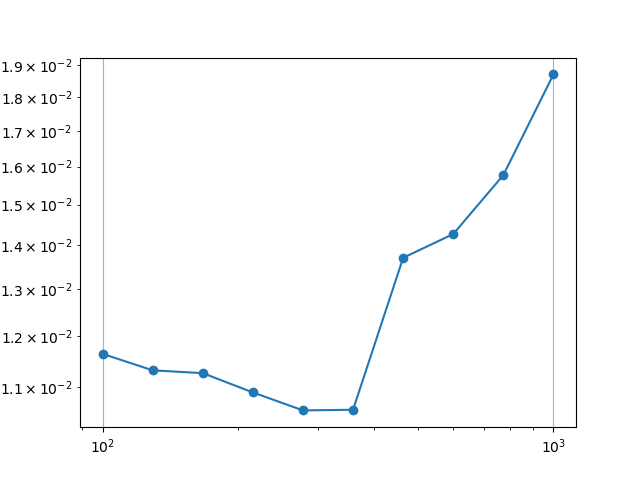

In [ ]:
fig, ax = plt.subplots()
ax.plot(L_full_range, times, 'o-')
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()
plt.show()

In [9]:
# evolve (adapt dt) - parameter sweep

# system parameters
# L_full = 45.0   # system size
Drho = 0.1      # fixed
Dc = 1.0        # fixed 
T = 5.0         # fixed
epsilon = 1e-1  # important
r = 1e-2        # important
lbd_spl = 15.0  # important

# initial conditions
mu_fact = 0.65  # part of lbd_spl to start at
sig = 4.0       # spread

# evolution parameters
n_steps = 10_000
dt = 1e5        # true dt is now adaptive. saving only at multiples of dt

kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)
lower_stab = -1/k * np.log(eps / k / kappa)
# print(f'{lower_stab = }')
# lbd_spl_range = np.linspace(lower_stab + 2, lower_stab + 10, 20, endpoint=True)

# lbd_spl_range = np.linspace(15.0, 17.0, 7, endpoint=True)
# sig_range     = [1.0, 5.0]
L_full_range = np.logspace(2.0, 2.5, 5, endpoint=True)

# params_list = [(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt) for lbd_spl in lbd_spl_range for epsilon in epsilon_range for sig in sig_range]
# params_list = [(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt) for lbd_spl in lbd_spl_range for sig in sig_range]
# params_list = [(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact / lbd_spl * L_full / 3, sig, n_steps, dt) for lbd_spl in lbd_spl_range]
params_list = [(3 * int(L_full / lower_stab), L_full, Drho, Dc, T, epsilon, r, lbd_spl, n_steps, dt) for L_full in L_full_range]

# last_times, time_successs, N_equilibrs = [], [], []

num_repeat = 5

for i, params in enumerate(params_list):#tqdm(enumerate(params_list), total=len(params_list)):
    for j in range(num_repeat):
        # print(f'{i + 1} / {len(params_list)}, {j + 1} / {num_repeat}')
        seed = 3670507 * 5 + 10244 * i + 37 * j
        t_range, lbd_vect_t, adj_matr_t = sip.evolve_adapt_timestep_smart(*params, ini_dist_type='chaos', mu=None, sig=None, save_bool=True, tqdm_bool=True, maxiter=1_000_000, seed=seed, verbose=False)
        # last_time, time_success, N_equilibr = sip.evolve_adapt_timestep_smart(*params, ini_dist_type='chaos', mu=None, sig=None, save_bool=False, tqdm_bool=True, maxiter=500_000, seed=129125 + 2 + j + 1000 * i, verbose=False)
        # last_times.append(last_time)
        # time_successs.append(time_success)
        # N_equilibrs.append(N_equilibr)
        # if np.sum(lbd_vect_t[:,-1] > 0) < 11:
        #     print('!!!!')
        #     t_range_broken, lbd_vect_t_broken, adj_matr_t_broken = t_range.copy(), lbd_vect_t.copy(), adj_matr_t.copy()
        # if save_bool:
        #     L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt = params
        #     # np.save(f'SIP_data/lbdvecttA_{L_full:.0f}_{Drho:.1f}_{Dc:.1f}_{T:.1f}_{epsilon:.2e}_{r:.0e}_{lbd_spl:.2f}_{mu_fact:.2f}_{sig:.1f}_{n_steps:.0e}_{dt:.0e}_{j}.npy', lbd_vect_t)
        #     # np.save(f'SIP_data/adjmatrtA_{L_full:.0f}_{Drho:.1f}_{Dc:.1f}_{T:.1f}_{epsilon:.2e}_{r:.0e}_{lbd_spl:.2f}_{mu_fact:.2f}_{sig:.1f}_{n_steps:.0e}_{dt:.0e}_{j}.npy', adj_matr_t)
        #     np.save(f'/scratch/n/Natan.Dominko/SIP_data/lbdvecttA_{L_full:.0f}_{Drho:.1f}_{Dc:.1f}_{T:.1f}_{epsilon:.2e}_{r:.0e}_{lbd_spl:.2f}_{mu_fact:.2f}_{sig:.1f}_{n_steps:.0e}_{dt:.0e}_{j}.npy', lbd_vect_t)
        #     np.save(f'/scratch/n/Natan.Dominko/SIP_data/adjmatrtA_{L_full:.0f}_{Drho:.1f}_{Dc:.1f}_{T:.1f}_{epsilon:.2e}_{r:.0e}_{lbd_spl:.2f}_{mu_fact:.2f}_{sig:.1f}_{n_steps:.0e}_{dt:.0e}_{j}.npy', adj_matr_t)


Worst case timer:   0%|          | 0/1000000 [00:00<?, ?it/s]/usr/lib64/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
Worst case timer:  30%|██▉       | 297987/1000000 [48:54<1:33:14, 125.48it/s]

Reached the last prepared random number, looping back.


Worst case timer:  60%|█████▉    | 595986/1000000 [1:34:30<56:39, 118.84it/s]  

Reached the last prepared random number, looping back.


Worst case timer:  89%|████████▉ | 894006/1000000 [2:19:15<19:47, 89.24it/s]   

Reached the last prepared random number, looping back.


Worst case timer: 100%|██████████| 1000000/1000000 [2:35:39<00:00, 107.08it/s]


KeyboardInterrupt: 

In [ ]:
np.savez('test.npz', t_range, lbd_vect_t, adj_matr_t)

In [ ]:
from os import listdir
filenames = [f for f in listdir('/scratch/n/Natan.Dominko/SIP_data')]
print(filenames)

[]


In [ ]:
# # read off dalbd_spls_tilde and perform 'observations'
# # from os import listdir
# # filenames = [f for f in listdir('evol_data/') if (f[:9] == "lbdvectt_")]

# # system parameters
# # L_full = 100   # system size
# Drho = 0.1      # fixed
# Dc = 1.0        # fixed 
# T = 5.0         # fixed
# epsilon = 1e-1  # important
# r = 1e-2        # important
# lbd_spl = 20.0  # important

# # initial conditions
# mu_fact = 0.65  # part of lbd_spl to start at
# sig = 4.0       # spread

# # evolution parameters
# n_steps = 100_000
# dt = 1e2        # true dt is now adaptive. saving only at multiples of dt

# kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)
# lower_stab = -1/k * np.log(eps / k / kappa)
# print(f'{lower_stab = }')
# # lbd_spl_range = np.linspace(lower_stab + 6, lower_stab + 10, 20, endpoint=True)

# # lbd_spl_range = np.linspace(15.0, 17.0, 7, endpoint=True)
# # sig_range     = [1.0, 5.0]
# L_full_range = np.logspace(3, 2, 5, endpoint=True)

# # params_list = [(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt) for lbd_spl in lbd_spl_range for epsilon in epsilon_range for sig in sig_range]
# # params_list = [(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt) for lbd_spl in lbd_spl_range for sig in sig_range]
# # params_list = [(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact / lbd_spl * L_full / 3, sig, n_steps, dt) for lbd_spl in lbd_spl_range]
# params_list = [(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact * lbd_spl, sig, n_steps, dt) for L_full in L_full_range]

# epsilons, lbd_spls, L_fulls, sigs, color_values, color_values2, color_values3 = [],[],[],[],[],[],[]

# num_repeat = 100

# for i, params in tqdm(enumerate(params_list), total=len(params_list)):
#     for j in range(num_repeat):
#         L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt = params
#         # lbd_vect_t = np.load(f'SIP_data/lbdvecttA_{L_full:.0f}_{Drho:.1f}_{Dc:.1f}_{T:.1f}_{epsilon:.2e}_{r:.0e}_{lbd_spl:.2f}_{mu_fact:.2f}_{sig:.1f}_{n_steps:.0e}_{dt:.0e}.npy')
#         # lbd_vect_t = np.load(f'SIP_data/lbdvecttA_{L_full:.0f}_{Drho:.1f}_{Dc:.1f}_{T:.1f}_{epsilon:.2e}_{r:.0e}_{lbd_spl:.2f}_{mu_fact:.2f}_{sig:.1f}_{n_steps:.0e}_{dt:.0e}_{j}.npy')
#         lbd_vect_t = np.load(f'/scratch/n/Natan.Dominko/SIP_data/lbdvecttA_{L_full:.0f}_{Drho:.1f}_{Dc:.1f}_{T:.1f}_{epsilon:.2e}_{r:.0e}_{lbd_spl:.2f}_{mu_fact:.2f}_{sig:.1f}_{n_steps:.0e}_{dt:.0e}_{j}.npy')
#         # adj_matr_t = np.load(f'/scratch/n/Natan.Dominko/SIP_data/adjmatrtA_{L_full:.0f}_{Drho:.1f}_{Dc:.1f}_{T:.1f}_{epsilon:.2e}_{r:.0e}_{lbd_spl:.2f}_{mu_fact:.2f}_{sig:.1f}_{n_steps:.0e}_{dt:.0e}.npy', allow_pickle=True)
#         t_range = np.arange(0, n_steps*dt, dt)

#         # n_bins_x = 30
#         # bin_edges_x = np.linspace(0, 1.2 * lbd_spl, n_bins_x + 1, endpoint=True)
#         # bin_center_x = 0.5 * (bin_edges_x[1:] + bin_edges_x[:-1])

#         # find true last time
#         last_ind = np.max(np.where(np.any(lbd_vect_t > 0, axis=0))[0])
#         last_time = t_range[last_ind]
#         try:
#             equi_time = t_range[np.max(np.where(np.abs(np.diff(np.sum(lbd_vect_t > 0, axis=0))))[0])]
#         except:
#             equi_time = 0.0
        
#         # end_vals = lbd_vect_t[lbd_vect_t[:, last_ind] > 0, last_ind]
#         # end_hist, _ = np.histogram(end_vals, bins=bin_edges_x, density=True)
        
#         # mean = np.trapz(end_hist * bin_center_x, bin_center_x)
#         # stdev= np.sqrt(np.trapz(end_hist * (mean - bin_center_x)**2, bin_center_x)) / lbd_spl
#         # print(f'{epsilon = :.2e}, {lbd_spl = :.2f}, {stdev}')

#         epsilons.append(epsilon)    
#         lbd_spls.append(lbd_spl)
#         L_fulls.append(L_full)
#         sigs.append(sig)
#         color_values.append(equi_time)
#         color_values2.append(last_time)
#         # color_values2.append(stdev)
#             # color_values3.append(end_hist)



lower_stab = 13.581912523491635


100%|██████████| 5/5 [00:15<00:00,  3.02s/it]


In [ ]:
def values2rgb(arr):
    maxval = max(arr)
    return [(el/maxval, 0, 1 - el/maxval, 0.3) for el in arr]

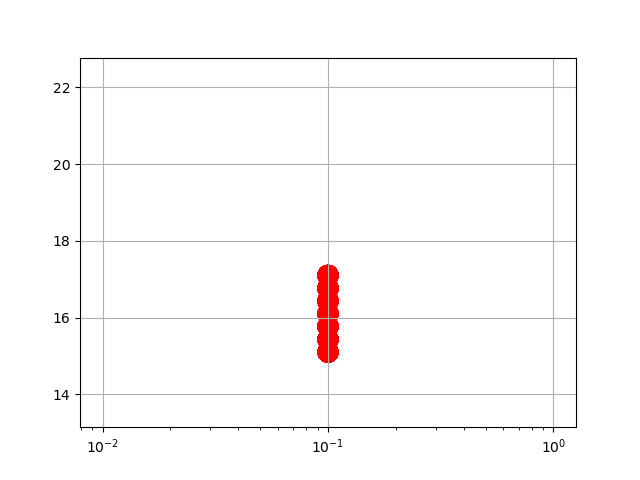

In [ ]:
from scipy.optimize import fsolve
fig, ax = plt.subplots()
scatter = ax.scatter(epsilons, [lbd_spls[i] + sigs[i]/10 for i in range(len(epsilons))], c=values2rgb(color_values2), s=200)
lower_stab_array = []
scale_argument = []
for epsilon in epsilons:
    kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)
    lower_stab_array.append(-1/k * np.log(eps / k / kappa))
    scale_argument.append(fsolve(lambda x: kappa * np.exp(-k * x) - kappa * np.exp(-k * x / 2) + eps * x / 2, 30))
ax.plot(epsilons, lower_stab_array, 'g-', label='argmax v_M')
ax.plot(epsilons, scale_argument, 'k-', label='scale argument')
ax.grid()
ax.set_xscale('log')
plt.show()


lower_stab = 13.581912523491635
scale_argument = [22.33755271]


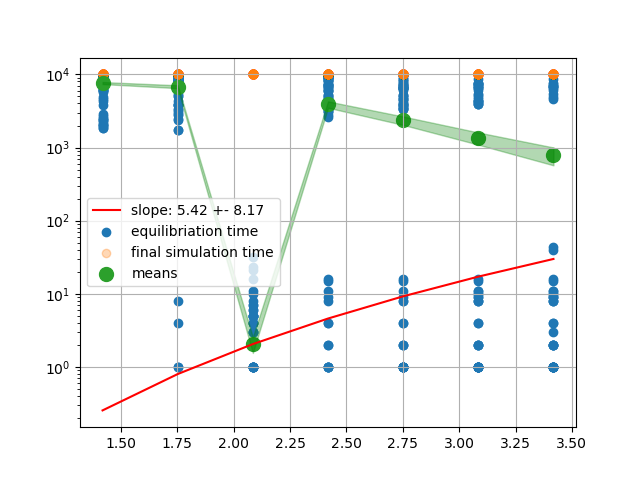

errs = array([[ 66.71669462, -49.01368408],
       [-49.01368408,  36.00828671]])


In [ ]:
from scipy.optimize import fsolve
kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)
lower_stab = -1/k * np.log(eps / k / kappa)
print(f'{lower_stab = }')
print(f'scale_argument = {(fsolve(lambda x: kappa * np.exp(-k * x) - kappa * np.exp(-k * x / 2) + eps * x / 2, 30))}')
fig, ax = plt.subplots()
lbd_spls = np.array(lbd_spls)
lbd_spls_tilde = lbd_spls[::num_repeat] - lower_stab
tms_means = np.array([np.mean(np.array(color_values[i*num_repeat:(i+1)*num_repeat])) for i in range(len(color_values)//num_repeat)])
tms_vars = np.array([np.var(np.array(color_values[i*num_repeat:(i+1)*num_repeat])) for i in range(len(color_values)//num_repeat)])
# ax.scatter(-L_full/lbd_spls+L_full/lower_stab, color_values, label='equilibriation time')
# ax.scatter(-L_full/lbd_spls+L_full/lower_stab, color_values2, alpha=0.3, label='final simulation time')
# ax.scatter(-L_full/lbd_spls[::num_repeat]+L_full/lower_stab, tms_means, s=100, label='means')

ax.scatter(lbd_spls - lower_stab, color_values, label='equilibriation time')
ax.scatter(lbd_spls - lower_stab, color_values2, alpha=0.3, label='final simulation time')
ax.scatter(lbd_spls_tilde, tms_means, s=100, label='means')
ax.fill_between(lbd_spls_tilde, tms_means-np.sqrt(tms_vars/num_repeat), tms_means+np.sqrt(tms_vars/num_repeat), color='g', alpha=0.3)

from scipy.optimize import curve_fit
slice = np.arange(len(lbd_spls_tilde))[:14]
(a, b), errs = curve_fit(lambda x, _a, _b :_a*x + _b, np.log(lbd_spls_tilde)[slice], np.log(tms_means)[slice], p0=(-1.0, 10.0), sigma=np.sqrt(tms_vars[slice]/num_repeat))
ax.plot(lbd_spls_tilde[slice], np.exp(1)**(a * np.log(lbd_spls_tilde)[slice] + b), 'r', label=f'slope: {a:.2f} +- {np.sqrt(errs[0, 0]):.2f}')
# ax.axvline(fsolve(lambda x: kappa * np.exp(-k * x) - kappa * np.exp(-k * x / 2) + eps * x / 2, 30)[0]-lower_stab, 0, 1, c='k', label='chaos existence') 
ax.legend()
ax.grid()
# ax.set_xscale('log')
ax.set_yscale('log')
plt.show()
print(f'{errs = }')

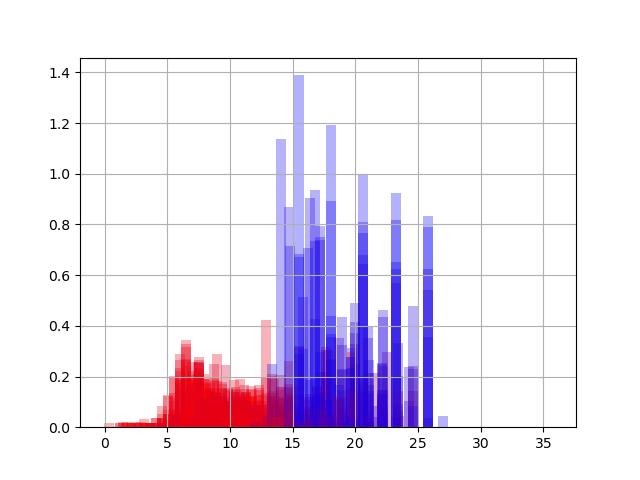

In [ ]:
fig, ax = plt.subplots()
for i in range(0, len(epsilons)):
    n_bins_x = 30
    bin_edges_x = np.linspace(0, 1.2 * lbd_spls[i], n_bins_x + 1, endpoint=True)
    bin_center_x = 0.5 * (bin_edges_x[1:] + bin_edges_x[:-1])

    ax.bar(bin_center_x, color_values3[i], color=values2rgb(color_values2)[i], label=f'epsilon = {epsilons[i]}, lbd_spl = {lbd_spls[i]}, sig = {sigs[i]}')
ax.grid()
plt.show()

In [12]:
# evolve hard split
# system parameters
L_full = 42.0   # system size
Drho = 0.1      # fixed
Dc = 1.0        # fixed 
T = 5.0         # fixed
epsilon = 1e-1  # important
lbd_spl = 20.0  # important
r = np.inf
kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)
lbd_max = -1 / k * np.log(eps / k / kappa)
print(f'Emerging scales: {lbd_spl/2 = :.2f}, argmax v_M = {lbd_max:.2f}, {lbd_spl = :.2f}')

# initial conditions
mu_fact = 1.0  # part of lbd_spl to start at
sig = 3.0       # spread
# lbd_vect_ini, adj_matr_ini = get_initials(L_full, lbd_spl, mu_fact, sig, Nmax_fact=8)
# print(lbd_vect_ini)
# print(adj_matr_ini)

# # evolution parameters
n_steps = 20_000
dt = 1e2
print(f'Evolving on [0, {n_steps * dt:.0e}] with {dt = }, saving {n_steps} sample points. ')

np.random.seed(300001)

_, _, _,t_range, lbd_vect_t, adj_matr_t = sip.evolve_adapt_timestep_hard_split(6, L_full, Drho, Dc, T, epsilon, r, lbd_spl, n_steps, dt, ini_dist_type='gauss', mu=L_full/3, sig=1.5, verbose=False, tqdm_bool=True, maxiter=1000, seed=0)

Emerging scales: lbd_spl/2 = 10.00, argmax v_M = 13.58, lbd_spl = 20.00
Evolving on [0, 2e+06] with dt = 100.0, saving 20000 sample points. 


Worst case timer:   0%|          | 0/1000 [00:00<?, ?it/s]

Worst case timer:   0%|          | 2/1000 [00:00<00:56, 17.82it/s]


In [ ]:
# equilibriation time sweep

# system parameters
# L_full = 100   # system size
Drho = 0.1      # fixed
Dc = 1.0        # fixed 
T = 5.0         # fixed
epsilon = 1e-1  # important
r = 1e-2        # important
lbd_spl = 15.0  # important

# evolution parameters
n_steps = 1
dt = 1e10     # true dt is now adaptive, only thing that matters is total time

L_full_range = np.logspace(3.0, 2.0, 1, endpoint=True)

params_list = [(3*int(L_full/lbd_spl), L_full, Drho, Dc, T, epsilon, r, lbd_spl, n_steps, dt) for L_full in L_full_range]

num_repeat = 3

end_time_array = np.zeros((len(params_list), num_repeat), dtype=float)
end_bool_array = np.zeros((len(params_list), num_repeat), dtype=bool)
end_N_array    = np.zeros((len(params_list), num_repeat), dtype=int)

for i, params in enumerate(params_list):
    for j in (range(num_repeat)):
        try:
            end_time_array[i,j], end_bool_array[i,j], end_N_array[i,j] = sip.evolve_adapt_timestep_equi_time(
                *params, 
                ini_dist_type='chaos', 
                mu=None, 
                sig=None, 
                tqdm_bool=True, 
                maxiter=1_000_000, 
                seed=4111*i + 121*j + 111)
        except:
            print("!")
            end_time_array[i,j] = dt * n_steps
            end_bool_array[i,j] = False
            end_N_array[i,j] = 0


Worst case timer:   0%|          | 0/1000000 [00:00<?, ?it/s]/usr/lib64/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
Worst case timer:   0%|          | 242/1000000 [00:02<2:28:01, 112.57it/s]


!


Worst case timer:   0%|          | 326/1000000 [00:03<2:37:17, 105.92it/s]

!


In [ ]:
np.savez('test.npz', end_time_array=end_time_array, end_bool_array=end_bool_array, end_N_array=end_N_array)

In [ ]:
L_fulls = np.load("/scratch/n/Natan.Dominko/equi_time_slurm/L_fulls.npy")
color_values = np.load("/scratch/n/Natan.Dominko/equi_time_slurm/last_times.npy")
color_values2 = np.load("/scratch/n/Natan.Dominko/equi_time_slurm/time_successs.npy")
L_full
# system parameters
# L_full = 100   # system size
Drho = 0.1      # fixed
Dc = 1.0        # fixed 
T = 5.0         # fixed
epsilon = 1e-1  # important
r = 1e-2        # important
lbd_spl = 20.0  # important

# initial conditions
mu_fact = 0.75  # part of lbd_spl to start at
sig = 5.0       # spread

# evolution parameters
n_steps = 10_000
dt = 1e5        # true dt is now adaptive anyway

kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)
lower_stab = -1/k * np.log(eps / k / kappa)

L_full_range = np.logspace(3.5, 2.5, 11, endpoint=True)

params_list = [(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt) for L_full in L_full_range]

num_repeat = 600


In [ ]:
n_sweep = 1
n_repeat = 1
n_jobs = 20
end_time_array_full = np.zeros((n_sweep, n_repeat * n_jobs))
end_bool_array_full = np.zeros((n_sweep, n_repeat * n_jobs))
end_N_array_full = np.zeros((n_sweep, n_repeat * n_jobs))

lbd_spl = 15
L_full_range = np.logspace(2.2, 2, n_sweep, endpoint=True)

for i in range(n_jobs):
    file = np.load(f"/scratch/n/Natan.Dominko/equi_time_sweep_slurm/outfiles/equi_time_results_{i+1}.npz", allow_pickle=True)
    # end_time_array = file['end_time_array']
    # end_bool_array = file['end_bool_array']
    # end_N_array = file['end_N_array']
    # end_time_array_full[:, n_repeat*i:n_repeat*(i+1)] = end_time_array
    # end_bool_array_full[:, n_repeat*i:n_repeat*(i+1)] = end_bool_array
    # end_N_array_full[:, n_repeat*i:n_repeat*(i+1)] = end_N_array

    t_range_array=file['t_range_array']
    lbd_vect_array=file['lbd_vect_array']
    # adj_matr_array=file['adj_matr_array']

print(lbd_vect_array)

# fig, ax = plt.subplots(figsize=(8,6))
# for i in range(np.shape(end_time_array_full)[0]):
#     mask = np.logical_and(end_time_array_full[i,:]>1e3, end_bool_array_full[i,:])
#     _factor = 1000
#     bin_edges = np.logspace(5, 8.5, 30)
#     bin_centers = np.sqrt(bin_edges[1:]*bin_edges[:-1])
#     ax.barh(bin_centers, width=np.histogram(end_time_array_full[i,mask], bins=bin_edges)[0]*L_full_range[i]/_factor, left=L_full_range[i]/lbd_spl, height=np.diff(bin_edges), color='grey', alpha=0.5, edgecolor='k', zorder=-10, label='$T$ distribution' if i==0 else '')
#     ax.barh(bin_centers, width=np.histogram(end_time_array_full[i, :], bins=bin_edges)[0]*L_full_range[i]/_factor, left=L_full_range[i]/lbd_spl, height=np.diff(bin_edges), color=(0, 0, 1, 0), edgecolor='k', zorder=-10)

# ax.scatter(end_N_array_full, end_time_array_full, c=np.repeat(np.arange(n_sweep).T, n_repeat*n_jobs))
# ax.scatter(L_full_range/lbd_spl, np.mean(end_time_array_full, axis=1), c='r', label='means')
# # ax.fill_between(L_fulls_tilde/lbd_spl, tms_means-np.sqrt(tms_vars/num_repeat), tms_means+np.sqrt(tms_vars/num_repeat), color='r', alpha=0.3)

# # from scipy.optimize import curve_fit
# # slice = np.arange(len(L_fulls_tilde))[:11]
# # (a, b), errs = curve_fit(lambda x, _a, _b :_a*x + _b, np.log10(L_fulls_tilde/lbd_spl)[slice], np.log10(tms_means)[slice], p0=(1.0, 5.0), sigma=np.sqrt(tms_vars/num_repeat)[slice])
# # ax.plot(L_fulls_tilde[slice]/lbd_spl, (L_fulls_tilde[slice]/lbd_spl)**a * 10**b, 'b', label=f'linear fit')
# ax.set_ylabel('$T$')
# ax.set_xlabel('$N$')
# # ax.set_title(f'Fit: \t $\log T \propto ({a:.2f} \pm$ {np.sqrt(errs[0][0]):.2f}) $\log N$')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.legend()
# ax.grid()
# plt.tight_layout()
# plt.show()




[[array([[ 8.07626802,  8.38205144, 11.67046259, ..., 14.40811991,
          14.40811991, 14.40811991],
         [14.7698226 ,  9.68051599, 10.2340504 , ...,  0.        ,
           0.        ,  0.        ],
         [14.03619969, 13.87104321,  0.        , ..., 14.40811999,
          14.40811999, 14.40811999],
         ...,
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ],
         [ 0.        ,  0.        ,  0.        , ...,  0.        ,
           0.        ,  0.        ]])                             ]]


(48, 1000000)


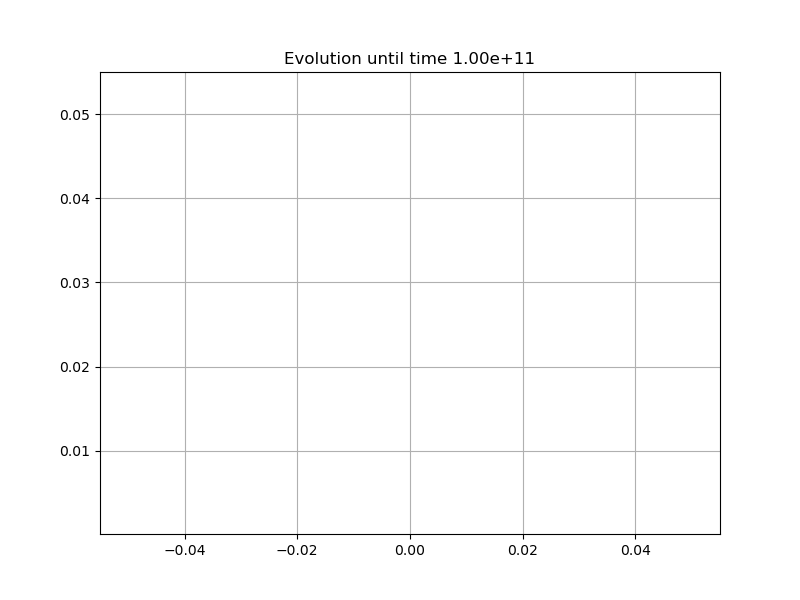

In [7]:
n_sweep = 1
n_repeat = 1
n_jobs = 1
stride = 100
smooth = np.ones((stride)) / stride

lbd_spl = 15
L_full_range = np.logspace(2.2, 2, n_sweep, endpoint=True)
lbd_vect_array = np.array([])
fig, ax = plt.subplots(figsize=(8,6))

for i in range(n_jobs):
    file = np.load(f"/scratch/n/Natan.Dominko/equi_time_sweep_slurm/outfiles/equi_time_results_{i+1}.npz", allow_pickle=True)
    # end_time_array = file['end_time_array']
    # end_bool_array = file['end_bool_array']
    # end_N_array = file['end_N_array']
    # end_time_array_full[:, n_repeat*i:n_repeat*(i+1)] = end_time_array
    # end_bool_array_full[:, n_repeat*i:n_repeat*(i+1)] = end_bool_array
    # end_N_array_full[:, n_repeat*i:n_repeat*(i+1)] = end_N_array

    t_range_array=file['t_range_array']
    print(file['lbd_vect_array'])
    # lbd_vect_array=np.hstack([lbd_vect_array, file['lbd_vect_array'][0,0].flatten()])
    # ax.plot(file['lbd_vect_array'][0,0][:,:5000].T)
    # adj_matr_array=file['adj_matr_array']
    # ax.hist(file['lbd_vect_array'][0,0].flatten(), bins = 200, density=True, histtype='step', label=f'{i = }')
    means = np.mean(file['lbd_vect_array'], axis = 0, where=file['lbd_vect_array'] > 0)
    means_smooth = np.convolve(means, smooth, mode='valid')
    vars  =  np.var(file['lbd_vect_array'], axis = 0, where=file['lbd_vect_array'] > 0)
    vars_smooth = np.convolve(vars, smooth, mode='valid')
    time_smooth = np.convolve(t_range_array, smooth, mode='valid')
    # ax.plot(time_smooth[1000:1000+900000], vars_smooth[1000:1000+900000])
    # ax.plot(means[1000:1000+10], vars[1000:1000+10])
    ax.plot(means_smooth[1000:1000+10000], vars_smooth[1000:1000+10000])
    # ax.hist2d(means_smooth[1000:1000+1000000], vars_smooth[1000:1000+1000000], bins=(10, 100))
    
# ax.hist(lbd_vect_array, bins = 200, density=True, histtype='step', color='k', linewidth=2, label='Average')
ax.grid()
# ax.legend()
# ax.set_yscale('log')
ax.set_ylim(1e-4)
ax.set_title(f'Evolution until time {np.max(t_range_array):.2e}')
plt.show()

In [5]:
from utils import reparameterize
reparameterize(0.1, 1.0, 5.0, 1e5, 0.0)

(1.5191835884530853, 1.0, 1.9189364728418243, array(0.05058596), 0.0)

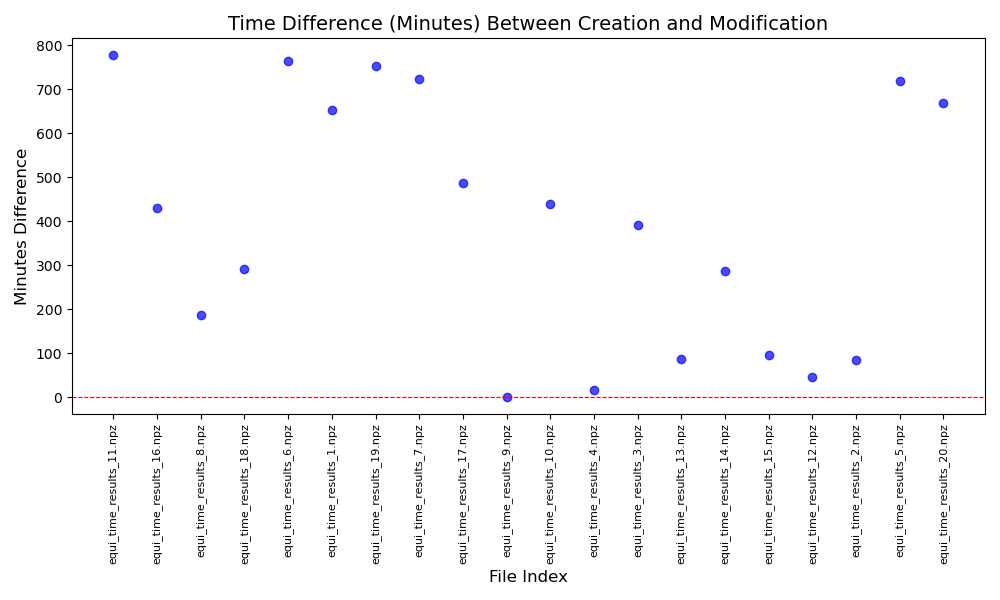

In [3]:
import os
from datetime import datetime
import matplotlib.pyplot as plt

# Define the directory containing the .npz files
directory_path = "/scratch/n/Natan.Dominko/equi_time_sweep_slurm/outfiles/"

# Manually provide creation times in "YYYY-MM-DD HH:MM:SS" format
manual_creation_time = "2024-12-10 10:25:00"# Replace with actual file names and their creation times


# Initialize lists to store file names and time differences
file_names = []
time_differences = []

try:
    for file_name in os.listdir(directory_path):
        if file_name.endswith(".npz"):
            file_path = os.path.join(directory_path, file_name)
            
            # Use the manual creation time if provided


            # Convert creation time from string to Unix timestamp
            creation_time = datetime.strptime(manual_creation_time, "%Y-%m-%d %H:%M:%S").timestamp()
            
            # Get the last modified time
            modified_time = os.path.getmtime(file_path)
            
            # Compute the time difference in minutes
            time_difference = (modified_time - creation_time) / 60.0
            
            # Store the file name and time difference
            file_names.append(file_name)
            time_differences.append(time_difference)

    # Plotting the scatter plot
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(file_names)), time_differences, color='blue', alpha=0.7)
    plt.axhline(0, color='red', linestyle='--', linewidth=0.8)  # Reference line at 0 minutes
    plt.title('Time Difference (Minutes) Between Creation and Modification', fontsize=14)
    plt.xlabel('File Index', fontsize=12)
    plt.ylabel('Minutes Difference', fontsize=12)
    plt.xticks(ticks=range(len(file_names)), labels=file_names, rotation=90, fontsize=8)
    plt.tight_layout()
    plt.show()
    
    plt.axhline(np.mean(np.array(time_differences)), color='k', linestyle='--', linewidth=0.8)  # Reference line at 0 minutes

except Exception as e:
    print(f"An error occurred: {e}")


In [4]:
print(np.mean(np.array(time_differences)))
np.mean(np.array(time_differences), where=np.array(time_differences) < 1000)

395.4625


395.4625

In [56]:
time_differences

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [ ]:
Drho = 0.1      # fixed
Dc = 1.0        # fixed 
T = 5.0         # fixed
epsilon = 1e-1  # important
r = 1e-2        # important
lbd_spl = 15.0  # important

# evolution parameters
n_steps = 100_000
dt = 1e2     # true dt is now adaptive, only thing that matters is total time

L_full = 10**(2.25)

params = (3*int(L_full/lbd_spl), L_full, Drho, Dc, T, epsilon, r, lbd_spl, n_steps, dt)
# t_range, lbd_vect_t, adj_matr_t = sip.evolve_adapt_timestep(
#                     *params,
#                     ini_dist_type='chaos', 
#                     mu=None, 
#                     sig=None, 
#                     tqdm_bool=True, 
#                     maxiter=100_000, 
#                     seed=1
#                     )
print(sip.evolve_adapt_timestep_equi_time_hardmax(
                    *params,
                    ini_dist_type='chaos', 
                    mu=None, 
                    sig=None, 
                    tqdm_bool=True, 
                    maxiter=100_000, 
                    seed=3
                    ))



Worst case timer:   0%|          | 0/100000 [00:00<?, ?it/s]/usr/lib64/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
Worst case timer:   7%|▋         | 7425/100000 [01:11<14:49, 104.12it/s]

(3863668.5768475737, True, 7)


In [ ]:
n_steps = 1
dt = 1e8     # true dt is now adaptive, only thing that matters is total time

params = (3*int(L_full/lbd_spl), L_full, Drho, Dc, T, epsilon, r, lbd_spl, n_steps, dt)
t_range, lbd_vect_t, adj_matr_t = sip.evolve_adapt_timestep(
                    *params,
                    ini_dist_type='chaos', 
                    mu=None, 
                    sig=None, 
                    tqdm_bool=True, 
                    maxiter=100_000, 
                    seed=3
                    )

Worst case timer:   0%|          | 0/100000 [00:00<?, ?it/s]/usr/lib64/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
Worst case timer:  20%|█▉        | 19724/100000 [03:16<13:18, 100.49it/s]


In [ ]:

# system parameters
# L_full = 100   # system size
Drho = 0.1      # fixed
Dc = 1.0        # fixed 
T = 5.0         # fixed
epsilon = 1e-1  # important
r = 1e-2        # important
lbd_spl = 15.0  # important


# evolution parameters
n_steps = 1
dt = 1e10        # true dt is now adaptive anyway

kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)
lower_stab = -1/k * np.log(eps / k / kappa)

L_full_range = np.logspace(3., 2., 5, endpoint=True)

params_list = [(3*int(L_full/lbd_spl), L_full, Drho, Dc, T, epsilon, r, lbd_spl, n_steps, dt) for L_full in L_full_range]

num_repeat = 5 * 20


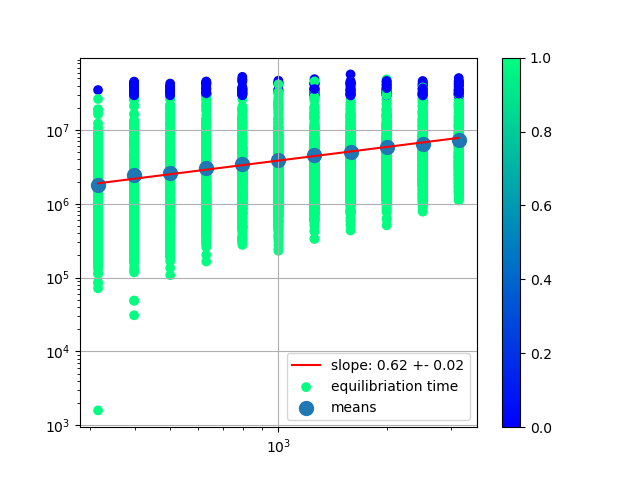

In [ ]:
from scipy.optimize import fsolve
kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)

fig, ax = plt.subplots()
L_fulls = np.array(L_fulls)
L_fulls_tilde = L_fulls[::num_repeat]
color_values_tilde = np.reshape(np.array(color_values), (num_repeat, len(color_values)//num_repeat), order='F')
color_values2_tilde = np.reshape(np.array(color_values2), (num_repeat, len(color_values2)//num_repeat), order='F')

tms_means = np.mean(color_values_tilde, axis=0, where=np.logical_and(color_values_tilde>1e3, color_values2_tilde))
tms_vars =   np.var(color_values_tilde, axis=0, where=np.logical_and(color_values_tilde>1e3, color_values2_tilde))

sc = ax.scatter(L_fulls, color_values, c=color_values2, cmap='winter', label='equilibriation time')
fig.colorbar(sc)
# ax.scatter(L_fulls, color_values2, alpha=0.3, label='final simulation time')
ax.scatter(L_fulls_tilde, tms_means, s=100, label='means')
# ax.fill_between(L_fulls_tilde, tms_means-np.sqrt(tms_vars/num_repeat), tms_means+np.sqrt(tms_vars/num_repeat), color='g', alpha=0.3)

from scipy.optimize import curve_fit
# slice = np.arange(len(L_fulls_tilde))#[:14]
(a, b), errs = curve_fit(lambda x, _a, _b :_a*x + _b, np.log(L_fulls_tilde), np.log(tms_means), p0=(-1.0, 10.0), sigma=np.sqrt(tms_vars/num_repeat))
ax.plot(L_fulls_tilde, np.exp(1)**(a * np.log(L_fulls_tilde) + b), 'r', label=f'slope: {a:.2f} +- {np.sqrt(errs[0, 0]):.2f}')
# ax.axvline(fsolve(lambda x: kappa * np.exp(-k * x) - kappa * np.exp(-k * x / 2) + eps * x / 2, 30)[0]-lower_stab, 0, 1, c='k', label='chaos existence') 
ax.legend()
ax.grid()
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()


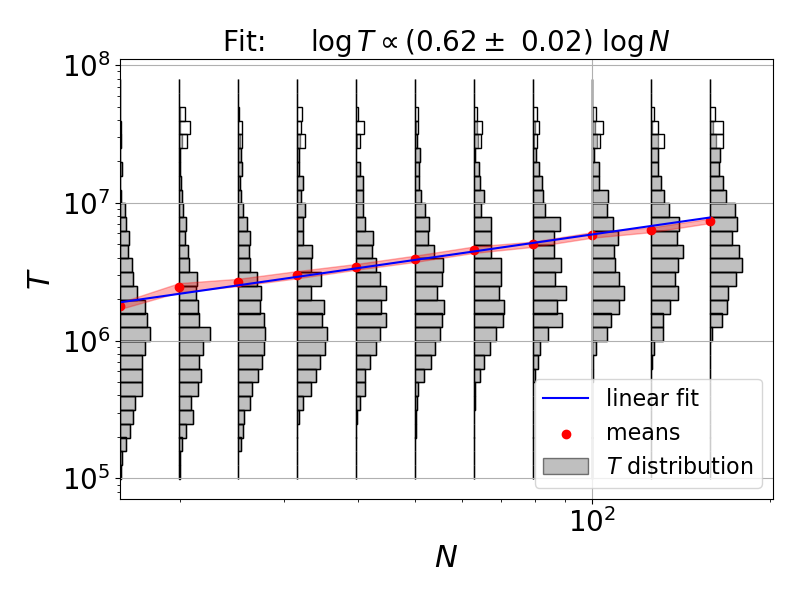

In [ ]:
plt.rcParams.update({
    'font.size': 18,          # Set the default font size for all elements
    'axes.titlesize': 20,     # Set the font size of the figure title
    'axes.labelsize': 22,     # Set the font size for the x and y labels
    'xtick.labelsize': 20,    # Set the font size for the x-axis tick labels
    'ytick.labelsize': 20,    # Set the font size for the y-axis tick labels
    'legend.fontsize': 16,    # Set the font size for the legend
    'figure.titlesize': 22    # Set the font size for the figure's main title
})
fig, ax = plt.subplots(figsize=(8,6))
for i in range(np.shape(color_values_tilde)[1]):
    mask = np.logical_and(color_values_tilde[:,i]>1e3, color_values2_tilde[:,i])
    _factor = 10000
    bin_edges = np.logspace(5.0,7.9, 30)
    bin_centers = np.sqrt(bin_edges[1:]*bin_edges[:-1])
    ax.barh(bin_centers, width=np.histogram(color_values_tilde[mask,i], bins=bin_edges)[0]*L_fulls_tilde[i]/_factor, left=L_fulls_tilde[i]/lbd_spl, height=np.diff(bin_edges), color='grey', alpha=0.5, edgecolor='k', zorder=-10, label='$T$ distribution' if i==0 else '')
    ax.barh(bin_centers, width=np.histogram(color_values_tilde[:   ,i], bins=bin_edges)[0]*L_fulls_tilde[i]/_factor, left=L_fulls_tilde[i]/lbd_spl, height=np.diff(bin_edges), color=(0, 0, 1, 0), edgecolor='k', zorder=-10)

ax.scatter(L_fulls_tilde/lbd_spl, tms_means, c='r', label='means')
ax.fill_between(L_fulls_tilde/lbd_spl, tms_means-np.sqrt(tms_vars/num_repeat), tms_means+np.sqrt(tms_vars/num_repeat), color='r', alpha=0.3)

from scipy.optimize import curve_fit
slice = np.arange(len(L_fulls_tilde))[:11]
(a, b), errs = curve_fit(lambda x, _a, _b :_a*x + _b, np.log10(L_fulls_tilde/lbd_spl)[slice], np.log10(tms_means)[slice], p0=(1.0, 5.0), sigma=np.sqrt(tms_vars/num_repeat)[slice])
ax.plot(L_fulls_tilde[slice]/lbd_spl, (L_fulls_tilde[slice]/lbd_spl)**a * 10**b, 'b', label=f'linear fit')
ax.set_ylabel('$T$')
ax.set_xlabel('$N$')
ax.set_title(f'Fit: \t $\log T \propto ({a:.2f} \pm$ {np.sqrt(errs[0][0]):.2f}) $\log N$')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend()
ax.grid()
plt.tight_layout()
plt.show()



In [ ]:
np.histogram(color_values_tilde[mask,i], bins=bin_edges)[0]

array([ 2,  4, 11, 19, 27, 31, 45, 45, 44, 52, 61, 55, 52, 35, 26, 24, 16,
       18, 12, 10,  2,  0,  3,  0,  1,  0,  0,  0,  0])

In [ ]:
# phase diagram (eq time (success))

# system parameters
L_full = 1000   # system size
Drho = 0.1      # fixed
Dc = 1.0        # fixed 
T = 5.0         # fixed
epsilon = 1e-1  # important
r = 1e-2        # important
# lbd_spl = 20.0  # important

# initial conditions
mu_fact = 0.95  # part of lbd_spl to start at
# sig = 5.0       # spread

# evolution parameters
n_steps = 10_000
dt = 1e6        # true dt is now adaptive. saving only at multiples of dt

# L_full_range = np.logspace(4.0, 2.0, 1, endpoint=True)
# epsilon_range = np.logspace(-2.0, 0.0, 7, endpoint=True)
lbd_spl_range = np.linspace(12.0, 30.0, 18, endpoint=True)
sig_range = [0.1, 3.0]

# params_list = [(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt) for sig in sig_range for lbd_spl in lbd_spl_range for epsilon in epsilon_range]
params_list = [(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt) for sig in sig_range for lbd_spl in lbd_spl_range]

epsilons, lbd_spls, sigs, color_values, color_values2 = [],[],[],[],[]

num_repeat = 1

for i, params in enumerate(params_list):#tqdm(enumerate(params_list), total=len(params_list)):#
    print(f"{i+1} / {len(params_list)}")
    for j in (range(num_repeat)):
        L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt = params
        np.random.seed(452999*i + 21321*j + 15)
        
        last_time, time_success = evolve_adapt_timestep_equi_time(*params, tqdm_bool=True, maxiter=100_000 if lbd_spl > lower_stab else 100, Nmax_fact=2.5)
        
        epsilons.append(epsilon)
        lbd_spls.append(lbd_spl)
        sigs.append(sig)
        color_values.append(last_time)
        color_values2.append(time_success)


1 / 36


Worst case timer: 100%|██████████| 100/100 [00:02<00:00, 46.68it/s]


2 / 36


Worst case timer: 100%|██████████| 100/100 [00:01<00:00, 52.65it/s]


3 / 36


Worst case timer:  64%|██████▍   | 63889/100000 [18:57<10:42, 56.17it/s]  


4 / 36


Worst case timer:   0%|          | 1/100000 [00:00<3:58:19,  6.99it/s]


5 / 36


Worst case timer:   0%|          | 0/100000 [00:00<?, ?it/s]


6 / 36


Worst case timer:   0%|          | 1/100000 [00:00<2:48:44,  9.88it/s]


7 / 36


Worst case timer:   0%|          | 1/100000 [00:00<2:44:21, 10.14it/s]


8 / 36


Worst case timer:   0%|          | 0/100000 [00:00<?, ?it/s]


9 / 36


Worst case timer:   0%|          | 0/100000 [00:00<?, ?it/s]


10 / 36


Worst case timer:   0%|          | 0/100000 [00:00<?, ?it/s]


11 / 36


Worst case timer:   0%|          | 1/100000 [00:00<2:03:59, 13.44it/s]


12 / 36


Worst case timer:   0%|          | 0/100000 [00:00<?, ?it/s]


13 / 36


Worst case timer:   0%|          | 1/100000 [00:00<5:58:05,  4.65it/s]


14 / 36


Worst case timer:   0%|          | 1/100000 [00:00<34:50, 47.84it/s]


15 / 36


Worst case timer:   0%|          | 1/100000 [00:00<44:54, 37.11it/s]


16 / 36


Worst case timer:   0%|          | 0/100000 [00:00<?, ?it/s]


17 / 36


Worst case timer:   0%|          | 0/100000 [00:00<?, ?it/s]


18 / 36


Worst case timer:   0%|          | 1/100000 [00:00<39:17, 42.43it/s]


19 / 36


Worst case timer: 100%|██████████| 100/100 [00:02<00:00, 42.50it/s]


20 / 36


Worst case timer: 100%|██████████| 100/100 [00:02<00:00, 48.67it/s]


21 / 36


Worst case timer:  96%|█████████▌| 96216/100000 [40:38<01:35, 39.46it/s]  


22 / 36


Worst case timer:  91%|█████████ | 90799/100000 [40:42<04:07, 37.17it/s]  


23 / 36


Worst case timer: 100%|██████████| 100000/100000 [42:22<00:00, 39.33it/s] 


24 / 36


Worst case timer: 100%|██████████| 100000/100000 [28:57<00:00, 57.56it/s] 


25 / 36


Worst case timer:  23%|██▎       | 22817/100000 [06:26<21:45, 59.11it/s]  


26 / 36


Worst case timer:   1%|          | 737/100000 [00:12<27:13, 60.77it/s]


27 / 36


Worst case timer:   0%|          | 385/100000 [00:06<28:36, 58.05it/s]


28 / 36


Worst case timer:   0%|          | 56/100000 [00:03<1:34:26, 17.64it/s]


29 / 36


Worst case timer:   0%|          | 11/100000 [00:00<59:19, 28.09it/s]  


30 / 36


Worst case timer:   0%|          | 15/100000 [00:00<1:06:49, 24.94it/s]


31 / 36


Worst case timer:   0%|          | 4/100000 [00:00<53:04, 31.40it/s]


32 / 36


Worst case timer:   0%|          | 2/100000 [00:00<1:02:31, 26.66it/s]


33 / 36


Worst case timer:   0%|          | 1/100000 [00:00<1:10:16, 23.72it/s]


34 / 36


Worst case timer:   0%|          | 1/100000 [00:00<1:07:13, 24.79it/s]


35 / 36


Worst case timer:   0%|          | 1/100000 [00:00<1:28:40, 18.80it/s]


36 / 36


Worst case timer:   0%|          | 1/100000 [00:00<1:09:38, 23.93it/s]


In [ ]:
np.save('epsilons.npy', np.array(epsilons))
np.save('lbd_spls.npy', np.array(lbd_spls))
np.save('sigs.npy', np.array(sigs))
np.save('color_values.npy', np.array(color_values))
np.save('color_values2.npy', np.array(color_values2))

In [ ]:
epsilons = np.load('epsilons.npy')
lbd_spls = np.load('lbd_spls.npy')
sigs = np.load('sigs.npy')
color_values = np.load('color_values.npy')
color_values2 = np.load('color_values2.npy')

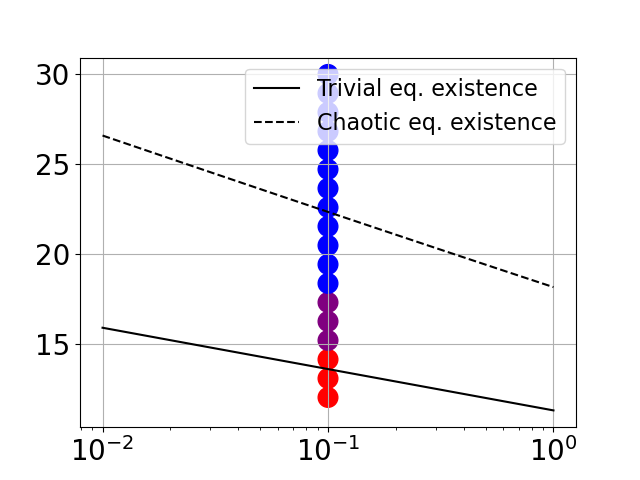

In [ ]:
fig, ax = plt.subplots()
c_red = np.array([1,0,0,1.0])
c_blu = np.array([0,0,1,1.0])
c_arr = np.array([c_blu if _c else c_red for _c in color_values2])
num_repeat = 1
c_arr = np.array([0.5*(c_arr[i] + c_arr[i+len(epsilons)//2]) for i in range(len(epsilons)//2)])
c_arr = np.array([np.mean(c_arr[num_repeat*i:num_repeat*(i+1)], axis=0) for i in range(len(epsilons)// 2 // num_repeat)])

ax.scatter(epsilons[0:len(epsilons)//2:num_repeat], lbd_spls[0:len(epsilons)//2:num_repeat], c=c_arr, s=200)
epsilon_array = np.logspace(-2, 0)
kappa, k, eps_array, _, _ = reparameterize(Drho, Dc, T, epsilon_array, r)
trivi_existence = -1/k * np.log(eps_array / k / kappa)
from scipy.optimize import fsolve
chaos_existence = np.asarray([fsolve(lambda x: kappa * np.exp(-k * x) - kappa * np.exp(-k * x / 2) + eps * x / 2, 30) for eps in eps_array]).flatten()
ax.plot(epsilon_array, trivi_existence,'k', label='Trivial eq. existence')
ax.plot(epsilon_array, chaos_existence,'k--', label='Chaotic eq. existence')
ax.legend()
ax.grid()
ax.set_xscale('log')
plt.show()


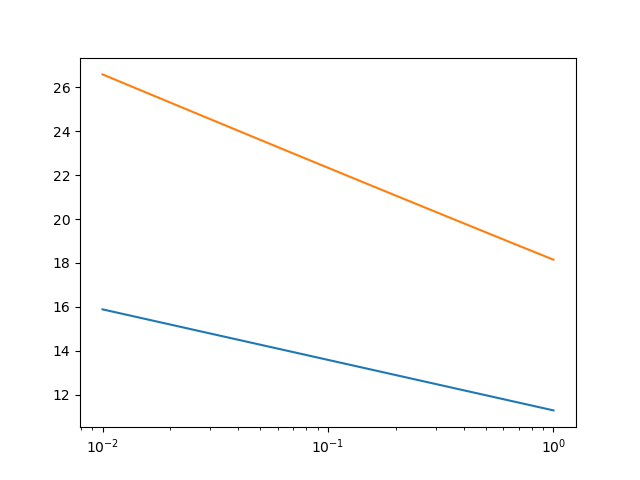

In [ ]:
epsilon_array = np.logspace(-2, 0)
kappa, k, eps_array, _, _ = reparameterize(Drho, Dc, T, epsilon_array, r)
from scipy.optimize import fsolve
chaos_existence = np.asarray([fsolve(lambda x: kappa * np.exp(-k * x) - kappa * np.exp(-k * x / 2) + eps * x / 2, 30) for eps in eps_array]).flatten()

fig, ax = plt.subplots()
ax.plot(epsilon_array, trivi_existence)
ax.plot(epsilon_array, chaos_existence)
ax.set_xscale('log')
plt.show()


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import SIPKSEvolve as sip
from utils import reparameterize
from tqdm import tqdm
# evolve (adapt dt)
# system parameters
L_full = 42.0   # system size
Drho = 0.1      # fixed
Dc = 1.0        # fixed 
T = 5.0         # fixed
epsilon = 1e-1  # important
r = 1e-2        # important
lbd_spl = 20  # important
kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)
lbd_max = -1 / k * np.log(eps / k / kappa)
print(f'Emerging scales: {lbd_spl/2 = :.2f}, argmax v_M = {lbd_max:.2f}, {lbd_spl = :.2f}')

# initial conditions
mu = 15
sig = 3       # spread
# lbd_vect_ini, adj_matr_ini = get_initials(L_full, lbd_spl, mu_fact, sig, Nmax_fact=8)
# print(lbd_vect_ini)
# print(adj_matr_ini)

# # evolution parameters
n_steps = 100_000
dt = 1e2
print(f'Evolving on [0, {n_steps * dt:.0e}] with {dt = }, saving {n_steps} sample points. ')

np.random.seed(31121)

t_range, lbd_vect_t, adj_matr_t = sip.evolve_adapt_timestep_hard_split(
        6, 
        L_full, 
        Drho, 
        Dc, 
        T, 
        epsilon, 
        r, 
        lbd_spl, 
        n_steps, 
        dt, 
        initial_distribution='gauss', 
        mu=mu, 
        sig=sig, 
        save_states='grid', # can be 'grid', 'event', or 'end'
        verbose=False, 
        tqdm_bool=True, 
        maxiter=1000, 
        seed=0
    )

/usr/lib64/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


Emerging scales: lbd_spl/2 = 10.00, argmax v_M = 13.58, lbd_spl = 20.00
Evolving on [0, 1e+07] with dt = 100.0, saving 100000 sample points. 


Worst case timer:  84%|████████▍ | 845/1000 [00:14<00:02, 56.48it/s]


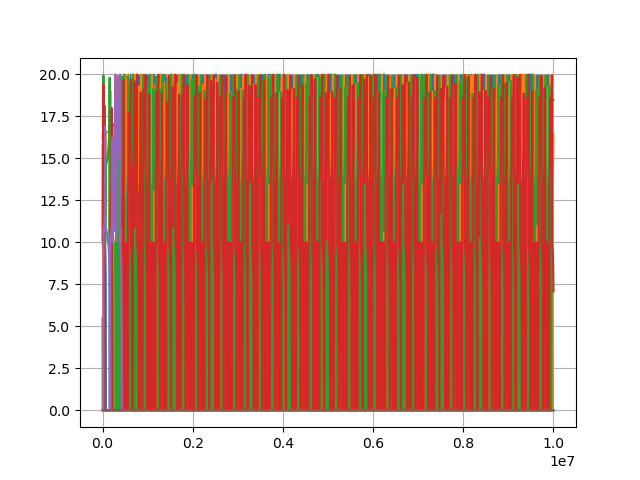

In [5]:
fig, ax = plt.subplots()
ax.plot(t_range, lbd_vect_t.T)
ax.grid()
plt.show()

In [ ]:
# read off data and histogram animation
from os import listdir
filenames = [f for f in listdir('evol_data/') if (f[:9] == "lbdvectt_")]

# system parameters
L_full = 10000   # system size
Drho = 0.1      # fixed
Dc = 1.0        # fixed 
T = 5.0         # fixed
# epsilon = 1e-2  # important
r = 1e-2        # important
# lbd_spl = 20.0  # important

# initial conditions
mu_fact = 0.85  # part of lbd_spl to start at
# sig = 5.0       # spread

# evolution parameters
n_steps = 100_000
dt = 1e1        # true dt is now adaptive. Save every dt

epsilon_range = np.logspace(-2, 0, 5, endpoint=True)
lbd_spl_range = np.linspace(12, 30, 7, endpoint=True)
sig_range     = [1.0, 5.0]

params_list = [(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt) for lbd_spl in lbd_spl_range for epsilon in epsilon_range for sig in sig_range]
    
i = 26
# for params in tqdm(enumerate(params_list), total=len(params_list)):
params = params_list[i]
L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt = params
kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)

print(f'{epsilon = :.2e}, {lbd_spl = :.2f}')
lbd_vect_t = np.load(f'/scratch/n/Natan.Dominko/SIP_data/lbdvecttA_{L_full:.0f}_{Drho:.1f}_{Dc:.1f}_{T:.1f}_{epsilon:.2e}_{r:.0e}_{lbd_spl:.2f}_{mu_fact:.2f}_{sig:.1f}_{n_steps:.0e}_{dt:.0e}.npy')
# adj_matr_t = np.load(f'/scratch/n/Natan.Dominko/SIP_data/adjmatrtA_{L_full:.0f}_{Drho:.1f}_{Dc:.1f}_{T:.1f}_{epsilon:.2e}_{r:.0e}_{lbd_spl:.2f}_{mu_fact:.2f}_{sig:.1f}_{n_steps:.0e}_{dt:.0e}.npy', allow_pickle=True)
t_range = np.arange(0, n_steps*dt, dt)

last_ind = np.max(np.where(np.any(lbd_vect_t > 0, axis=0))[0])

n_bins_x = 30
bin_edges_x = np.linspace(0, 1.2 * lbd_spl, n_bins_x + 1, endpoint=True)
bin_center_x = 0.5 * (bin_edges_x[1:] + bin_edges_x[:-1])

# find true last time
last_ind = np.max(np.where(np.any(lbd_vect_t > 0, axis=0))[0])
end_vals = lbd_vect_t[lbd_vect_t[:, last_ind] > 0, last_ind]
end_hist, _ = np.histogram(end_vals, bins=bin_edges_x, density=True)


epsilon = 3.16e-01, lbd_spl = 18.00


/home/n/Natan.Dominko/Documents/code/peaks_analysis/MFKSSteadyState.py:57: RuntimeWarning: overflow encountered in exp
  res = np.where((lbd > lbd_spl) & (lbd < lbd_inf), np.exp(-0.5*av_int.sol(lbd)), np.nan)


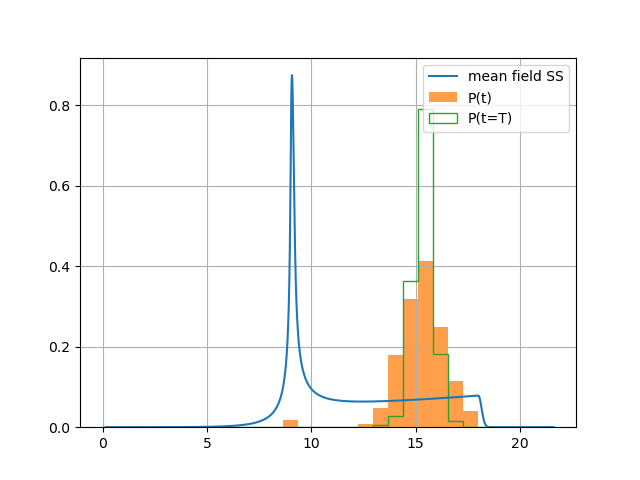

In [ ]:
from matplotlib.animation import FuncAnimation

# Step 1: Generate initial data
stride = 10
data = lbd_vect_t[:,0:stride].flatten()

# Step 2: Create the figure and axis
fig, ax = plt.subplots()
ax.grid()
from MFKSSteadyState import get_P_ss
xss, Pss = get_P_ss(1.2*lbd_spl, kappa, k, eps, lbd_spl, r)
ax.plot(xss, Pss, label='mean field SS')

# Create the initial histogram (the first frame)
n_bins = 30
bin_edges = np.linspace(0, 1.2 * lbd_spl, n_bins + 1, endpoint=True)
bin_center = 0.5 * (bin_edges[1:] + bin_edges[:-1])
hist, bin_edges, patches = ax.hist(data[data > 0], bins=bin_edges, density=True, alpha=0.75,  label='P(t)')

ax.hist(lbd_vect_t[lbd_vect_t > 0].flatten(), bins=bin_edges, density=True, histtype='step', label='P(t=T)')
ax.legend()

# Step 3: Define the update function for animation
def update(frame):
    new_data = lbd_vect_t[:,frame*stride:(frame+1)*stride].flatten()  # Generate new data for each frame
    new_hist_values, _ = np.histogram(new_data[new_data > 0], bins=bin_edges, density=True)  # Calculate new histogram values

    # Update the heights of the histogram bars
    for patch, new_height in zip(patches, new_hist_values):
        patch.set_height(new_height)

    ax.set_xlim([0, 1.2 * lbd_spl])  # Fix x-axis limits
    ax.set_ylim([0, 0.5])  # Fix y-axis limits
    ax.set_title(f'{epsilon = :.2e}, {lbd_spl = :.2f}, time: {stride * frame * dt:.2e}')  # Display the current frame number

# Step 4: Create the animation
ani = FuncAnimation(fig, update, frames=500, interval=100)

# Show the animated plot
plt.show()


In [ ]:
plt.close('all')

In [ ]:
# full (linearized) system near eq., eigvals
import numpy as np
def get_matr(N):
    A = np.zeros((N,N))
    for i in range(N):
        if i < N-1:
            A[i, i+1] += 1
            A[i, i] -= 1
        if i > 0:
            A[i, i-1] += 1
            A[i, i] -= 1
    return A
        
import matplotlib.pyplot as plt
%matplotlib widget
fig, ax = plt.subplots()
for N in [100]:
    matr = get_matr(N)
    matr[:,np.arange(N)>int(0.7 * N)] *= -0.6
    # matr[:,np.arange(N)%4==0] *= -2.6
    print(matr)
    ax.plot(np.linspace(0, 1-1/N, N), np.sort(np.linalg.eigvals(matr))[::-1], 'o-') # 2*(1 - np.cos(np.pi*np.linspace(0, 1-1/N, N)))
ax.plot(np.linspace(0, 1-1/100, 100), -2*(1 - np.cos(np.pi*np.linspace(0, 1-1/100, 100))), 'k-')
ax.plot(np.linspace(0, 1-1/100, 100), 0.6*2*(1 - np.cos(np.pi*np.linspace(0, 1-1/100, 100)))[::-1], 'r-')
ax.vlines(0.3, -3, 3, 'g')
ax.grid()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

[[-1.   1.   0.  ... -0.  -0.  -0. ]
 [ 1.  -2.   1.  ... -0.  -0.  -0. ]
 [ 0.   1.  -2.  ... -0.  -0.  -0. ]
 ...
 [ 0.   0.   0.  ...  1.2 -0.6 -0. ]
 [ 0.   0.   0.  ... -0.6  1.2 -0.6]
 [ 0.   0.   0.  ... -0.  -0.6  0.6]]


In [ ]:
from scipy.stats import gaussian_kde
def KDE_with_error(data, x_eval, bandwidth, n_bootstraps):
    # Perform KDE
    kde = gaussian_kde(data, bw_method=bandwidth)
    pdf = kde.evaluate(x_eval)
    
    # Bootstrap to estimate the errors
    bootstrap_pdfs = np.zeros((n_bootstraps, len(x_eval)))
    
    for i in tqdm(range(n_bootstraps)):
        sample = np.random.choice(data, size=len(data), replace=True)
        kde_sample = gaussian_kde(sample, bw_method=bandwidth)
        bootstrap_pdfs[i, :] = kde_sample.evaluate(x_eval)
    
    # Calculate the standard error of the KDE estimates
    pdf_std_error = np.std(bootstrap_pdfs, axis=0)
    return pdf, pdf_std_error


In [ ]:
# phase diagram plots
from os import listdir
filenames = [f for f in listdir('evol_data/') if (f[:9] == "lbdvectt_")]
# print(f"Files in current directory: {filenames}")

fig, ax = plt.subplots()
epsilons = []    
lbd_spls = []
sigs = []
color_values = []
color_values2 = []
for filename in filenames:
    
    lbd_vect_t = np.load('evol_data/' + filename)
    param_strings = filename.split('_')
    epsilon = float(param_strings[1])
    lbd_spl = float(param_strings[2])
    L_full  = float(param_strings[3])
    mu_fact = float(param_strings[4])
    sig     = float(param_strings[5])
    n_steps = int(float(param_strings[6]))
    dt      = float(param_strings[7])
    stride_save = int(float(param_strings[8][:-4]))

    if n_steps != 1000000:
        continue

    n_bins_x = 30
    bin_edges_x = np.linspace(0, 1.2 * lbd_spl, n_bins_x + 1, endpoint=True)
    bin_center_x = 0.5 * (bin_edges_x[1:] + bin_edges_x[:-1])

    end_vals = lbd_vect_t[lbd_vect_t[:, -1] > 0, -1]
    end_hist, _ = np.histogram(end_vals, bins=bin_edges_x, density=True)
    
    mean = np.trapz(end_hist * bin_center_x, bin_center_x)
    stdev= np.sqrt(np.trapz(end_hist * (mean - bin_center_x)**2, bin_center_x)) / lbd_spl
    # print(f'{epsilon = :.2e}, {lbd_spl = :.2f}, {stdev}')

    epsilons.append(epsilon)    
    lbd_spls.append(lbd_spl)
    sigs.append(sig)
    color_values.append(stdev)
    color_values2.append(np.sum((lbd_vect_t < 5) * (lbd_vect_t > 0)))

# scatter = ax.scatter(epsilons, [lbd_spls[i] + 0.5 * (sigs[i] - 1) / 4 for i in range(len(lbd_spls))], c=color_values, s=200, cmap='coolwarm')
# scatter = ax.scatter(epsilons, [lbd_spls[i] + 0.5 * (sigs[i] - 1) / 4 for i in range(len(lbd_spls))], c=[np.log(_l+1) for _l in color_values2], s=200, cmap='bwr')
scatter = ax.scatter(epsilons, lbd_spls, c=[(1,0,0,0.3) if _c > 0.1 else (0,0,1,0.3) for _c in color_values], s=200)
# fig.colorbar(scatter, ax=ax)
ax.grid()
ax.set_xscale('log')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'evol_data/'

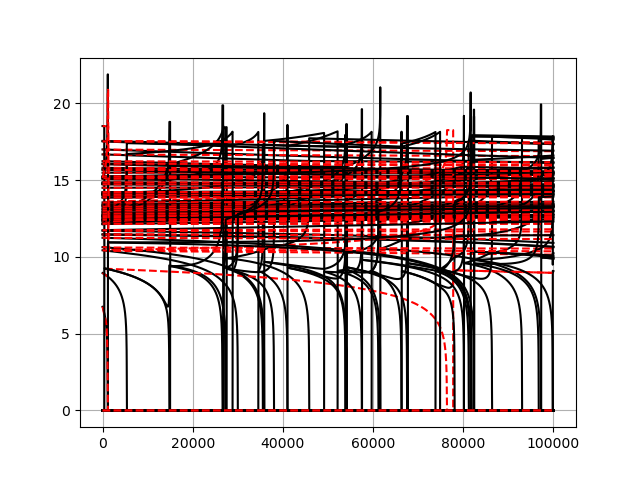

In [ ]:
fig, ax = plt.subplots()
for i in range(Nmax):
    ax.plot(t_range, lbd_vect_t[i, :], 'k-')
    ax.plot(t_range, lbd_vect_t_2[i, :], 'r--')
    # ax.plot(sol.t, sol.y[i, :], 'r--')
# ax.plot(t_range, np.sum(lbd_vect_t, axis=0))

ax.grid()
plt.show()

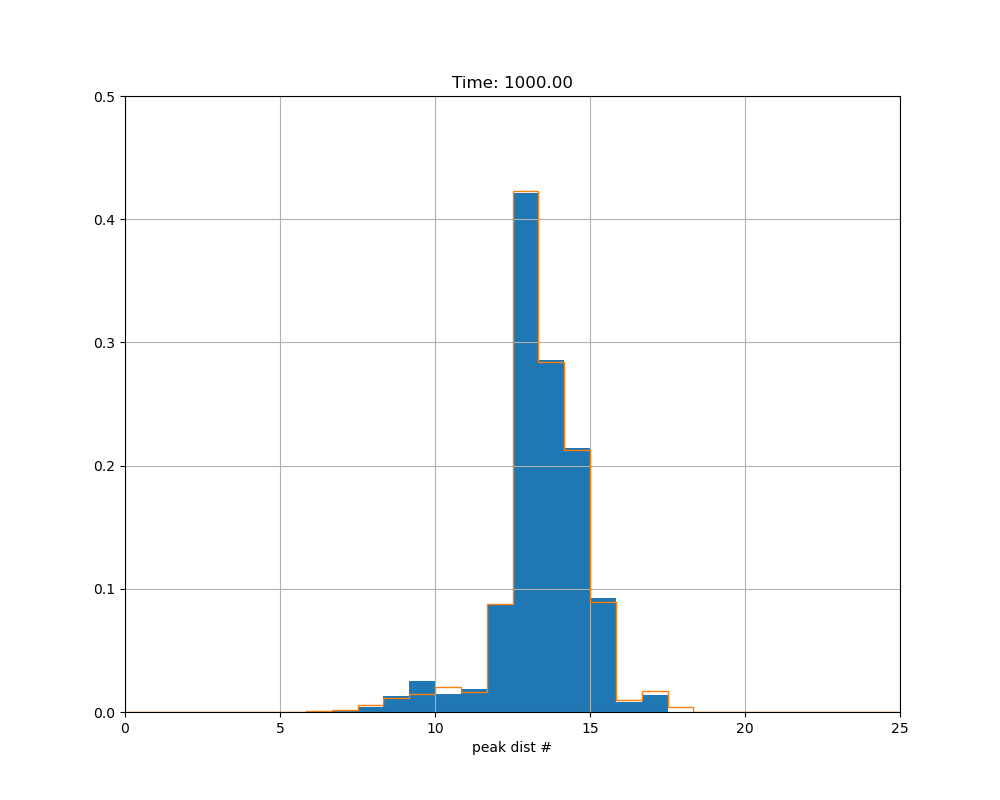

In [ ]:
n_bins_x = 30
bin_edges_x = np.linspace(0, 25, n_bins_x + 1, endpoint=True)
bin_center_x = 0.5 * (bin_edges_x[1:] + bin_edges_x[:-1])


fig = plt.figure(figsize=(10,8))
k = 100
plt.hist(lbd_vect_t[lbd_vect_t > 0], bins=bin_edges_x, density=True)
plt.hist(lbd_vect_t_2[lbd_vect_t_2 > 0], bins=bin_edges_x, density=True, histtype='step')
# plt.plot(bin_center_x, KDE_with_error(lbd_vect_t[lbd_vect_t > 0], bin_center_x, bandwidth=None, n_bootstraps=100)[0])
plt.title(f'Time: {t_range[k]:.2f}')
plt.xlabel('peak dist #')
plt.xlim(0, 25)
plt.ylim(0, 0.5)
plt.grid()
plt.show()

In [ ]:
plt.close('all')
print(np.shape(lbd_vect_t))

(66, 1000)


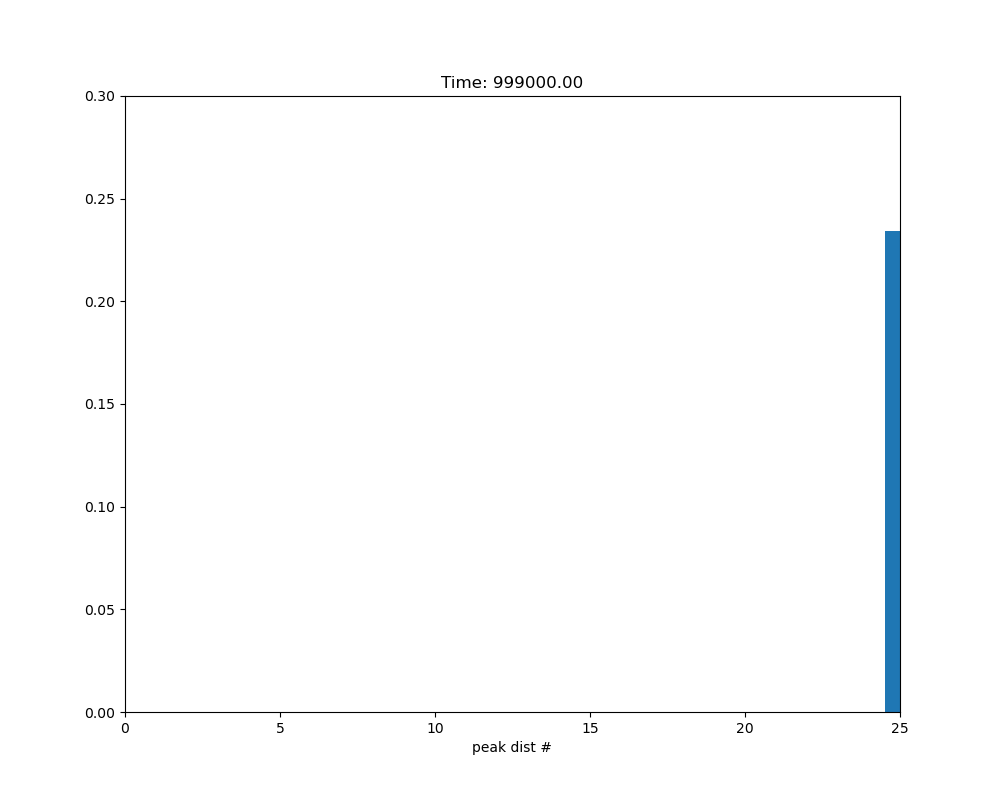

No such comm: 9daeca8d9d04430387f650d5ecc84eb2


In [ ]:
n_bins_x = 40
bin_edges_x = np.linspace(0, 35, n_bins_x + 1, endpoint=True)
bin_center_x = 0.5 * (bin_edges_x[1:] + bin_edges_x[:-1])

from matplotlib.animation import FuncAnimation

# Animation function
plt.close('all')
def animate(k):
    plt.cla()
    plt.hist(lbd_vect_t[lbd_vect_t[:, k] > 0, k], bins=bin_edges_x, density=True)
    # plt.plot(bin_center_x, KDE_with_error(lbd_vect_t[lbd_vect_t[:, k] > 0, k], bin_center_x, bandwidth=None, n_bootstraps=100)[0])
    plt.title(f'Time: {t_range[k]:.2f}')
    plt.xlabel('peak dist #')
    plt.xlim(0, 25)
    plt.ylim(0, 0.3)

# Create animation
fig = plt.figure(figsize=(10,8))
ani = FuncAnimation(fig, animate, frames=n_steps // stride_save, interval=1)
ani.save('distances_hist_model4.gif', writer='imagemagick', fps=10)# Display animation
# plt.show()

## Trash

In [ ]:
# functions (fixed timestep)
def rhs(lbd_vect, adj_matr, kappa, k, eps):
    return adj_matr @ g(lbd_vect, kappa, k, eps)

def step(lbd_vect, adj_matr, random_uniform, dt, kappa, k, eps, lbd_spl, r):
    # handle splitting
    potential_split_inds = np.where(lbd_vect > lbd_spl)[0]
    for i, potential_split_ind in enumerate(potential_split_inds):
        if random_uniform.get_next() < dt * r * (lbd_vect[potential_split_ind] - lbd_spl):
            lbd_vect, adj_matr = split(potential_split_ind, lbd_vect, adj_matr)
    # handle dynamics
    lbd_vect_tilde = lbd_vect + dt * rhs(lbd_vect, adj_matr, kappa, k, eps)   
    return fix_negative(lbd_vect_tilde, adj_matr)

def evolve_fixed_timestep(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt, stride_save, tqdm_bool=True):
    kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)

    # initial conditions
    lbd_vect_ini, adj_matr_ini = get_initials(L_full, lbd_spl, mu_fact, sig)
    Nmax = len(lbd_vect_ini)
    
    # initialize variables
    t_range = np.arange(0, dt * n_steps, dt * stride_save)
    lbd_vect_t = np.zeros((Nmax, n_steps // stride_save))
    adj_matr_t = np.zeros((n_steps // stride_save), dtype=object)
    lbd_vect_t[:, 0] = lbd_vect_ini
    adj_matr_t[0] = adj_matr_ini
    lbd_vect, adj_matr = lbd_vect_ini, adj_matr_ini
    random_uniform_array = PrecompiledRandomGenerator(10_000_000)

    # evolve
    _iter = tqdm(range(1, n_steps)) if tqdm_bool else range(1, n_steps)
    for i in _iter:
        lbd_vect, adj_matr = step(lbd_vect, adj_matr, random_uniform_array,  dt, kappa, k, eps, lbd_spl, r)
        # save at some steps
        if i % stride_save == 0:
            # make sure adj matrix is sparse 
            adj_matr = csr_matrix(adj_matr.toarray())
            lbd_vect_t[:, i//stride_save] = lbd_vect
            adj_matr_t[   i//stride_save] = adj_matr
    
    return t_range, lbd_vect_t, adj_matr_t


In [ ]:
# evolve (fixed dt)

# system parameters
L_full = 1000   # system size
Drho = 0.1      # fixed
Dc = 1.0        # fixed 
T = 5.0         # fixed
epsilon = 1e-2  # important
r = 1e-2        # important
lbd_spl = 20.0  # important
kappa, k, eps = reparameterize(Drho, Dc, T, epsilon)
lbd_max = -1 / k * np.log(eps / k / kappa)
print(f'Emerging scales: {lbd_spl/2 = :.2f}, argmax v_M = {lbd_max:.2f}, {lbd_spl = :.2f}')

# initial conditions
mu_fact = 0.85  # part of lbd_spl to start at
sig = 5.0       # spread
lbd_vect_ini, adj_matr_ini = get_initials(L_full, lbd_spl, mu_fact, sig)
Nmax = len(lbd_vect_ini)
print(f'Simulation supports at most {Nmax} plateaus. ')

# evolution parameters
n_steps = 1_000_000 
dt = 1e0
stride_save = 100
print(f'Evolving on [0, {n_steps * dt:.0e}] with {dt = }, saving {n_steps // stride_save} sample points. ')

t_range, lbd_vect_t, adj_matr_t = evolve_fixed_timestep(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt, stride_save)

Emerging scales: lbd_spl/2 = 10.00, argmax v_M = 15.88, lbd_spl = 20.00
Simulation supports at most 100 plateaus. 
Evolving on [0, 1e+06] with dt = 1.0, saving 10000 sample points. 


100%|██████████| 999999/999999 [00:28<00:00, 34580.55it/s]


NameError: name 'lbd_vect_t' is not defined

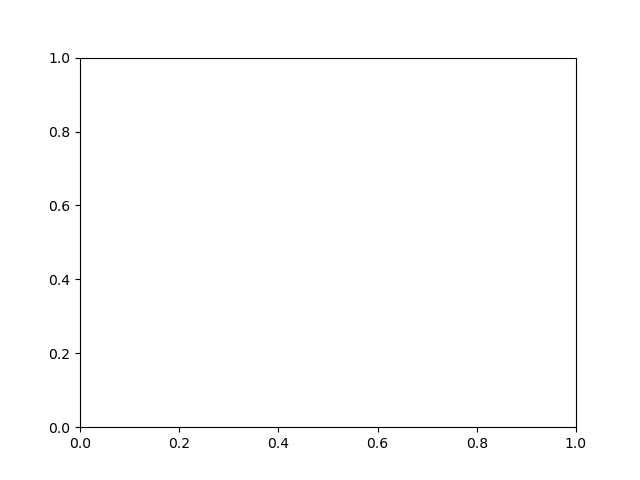

In [ ]:
# plot solution 
fig, ax = plt.subplots()
assert np.all(np.isclose(np.sum(lbd_vect_t, axis=0), L_full))
for i in range(Nmax):
    ax.plot(t_range, lbd_vect_t[i, :])
ax.grid()
plt.show()

In [ ]:
# evolve (fixed dt) - parameter sweep

# system parameters
L_full = 1000   # system size
Drho = 0.1      # fixed
Dc = 1.0        # fixed 
T = 5.0         # fixed
# epsilon = 1e-2  # important
r = 1e-2        # important
# lbd_spl = 20.0  # important

# initial conditions
mu_fact = 0.85  # part of lbd_spl to start at
# sig = 5.0       # spread

# evolution parameters
n_steps = 1_000_000
dt = 1e0
stride_save = 1_000

epsilon_range = np.logspace(-2, 0, 5, endpoint=True)
lbd_spl_range = np.linspace(12, 30, 7, endpoint=True)
sig_range     = [1.0, 5.0]

params_list = [(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt, stride_save) for lbd_spl in lbd_spl_range for epsilon in epsilon_range for sig in sig_range]

save_bool = False
for i, params in tqdm(enumerate(params_list), total=len(params_list)):
    t_range, lbd_vect_t, adj_matr_t = evolve_fixed_timestep(*params, tqdm_bool=False)
    if save_bool:
        L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact, sig, n_steps, dt, stride_save = params
        # np.save(f'evol_data/lbdvectt_{epsilon:.2e}_{lbd_spl:.2f}_{L_full:.0f}_{mu_fact:.2f}_{sig:.1f}_{n_steps:.0e}_{dt:.0e}_{stride_save:.0e}.npy', lbd_vect_t)
        # np.save(f'evol_data/adjmatrt_{epsilon:.2e}_{lbd_spl:.2f}_{L_full:.0f}_{mu_fact:.2f}_{sig:.1f}_{n_steps:.0e}_{dt:.0e}_{stride_save:.0e}.npy', adj_matr_t)


  0%|          | 0/70 [00:00<?, ?it/s]/usr/lib64/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|██████████| 70/70 [00:07<00:00,  9.70it/s]


In [ ]:
# def get_ordering(adj_matr, order_old):
#     Nmax = np.shape(adj_matr)[0]
#     order_new = -np.ones_like(order_old)
#     neighbor_inds = sparse_find_neighbors(adj_matr, order_old[0])
#     # edge selection
#         # if previous edge is still edge, select it to start
#         # elif one of her neighbors is edge, select it to start
#         # else choose one randomly
#     if len(neighbor_inds) == 1:
#         order_new[0] = order_old[0]
#     elif len(neighbor_inds) == 2:
#         if len(sparse_find_neighbors(adj_matr, neighbor_inds[0])) == 1:
#             order_new[0] = neighbor_inds[0]
#         elif len(sparse_find_neighbors(adj_matr, neighbor_inds[1])) == 1:
#             order_new[0] = neighbor_inds[1]
#         else:
#             raise ValueError
#     elif len(neighbor_inds) == 0:
#         order_new[0] = order_old[1]
#     else: # fix this
#         raise ValueError
        
#     current_ind = sparse_find_neighbors(adj_matr, order_new[0])[0]
#     current_neighbor_inds = sparse_find_neighbors(adj_matr, current_ind)
#     for i in range(1, Nmax):
#         order_new[i] = current_ind
#         if len(current_neighbor_inds) == 1:
#             order_new[i+1:] = [ind for ind in np.arange(Nmax) if ind not in order_new[:i+1]]
#             break
#         else:
#             current_ind = [neighbor_ind for neighbor_ind in current_neighbor_inds if neighbor_ind != order_new[i-1]][0]
#             current_neighbor_inds = sparse_find_neighbors(adj_matr, current_ind)

#     return order_new

# def check_already_ordered(adj_matr, order):
#     must_be_tridiag = adj_matr.toarray()[np.ix_(order, order)]
#     if np.all(np.triu(must_be_tridiag, 2) == 0.0):
#         return True
#     else:
#         return False

# def reorder_particles(lbd_vect_t, adj_matr_t):
#     Nmax = np.shape(adj_matr_t[0])[0]
#     order_t = np.zeros_like(lbd_vect_t, dtype=int)
#     lbd_vect_t_reorder = np.zeros_like(lbd_vect_t)
#     order_t[:, 0] = get_ordering(adj_matr_t[0], order_old=np.arange(Nmax, dtype=int))
#     lbd_vect_t_reorder[:, 0] = lbd_vect_t[order_t[:, 0], 0]
#     for i in tqdm(range(1, n_steps)):
#         already_ordered = False#check_already_ordered(adj_matr_t[i], order_t[:, i-1])
#         if already_ordered: # edge state
#             order_t[:, i] = order_t[:, i-1]
#         else:
#             order_t[:, i] = get_ordering(adj_matr_t[i], order_old=order_t[:, i-1])

#         lbd_vect_t_reorder[:, i] = lbd_vect_t[order_t[:, i], i]
#     return lbd_vect_t_reorder


In [ ]:
# 3d case with fixed 1st and 3rd coordinate
def get_ordering(adj_matr, lbd_vect, order_old):
    start_ind, end_ind = np.argwhere(adj_matr.diagonal() == -1).T[0]
    order_new = -np.ones_like(order_old)
    if start_ind == order_old[0] or end_ind == order_old[2]:
        order_new[0] = start_ind
        order_new[2] = end_ind
    else:
        order_new[0] = end_ind
        order_new[2] = start_ind
    lbd_vect_temporary = lbd_vect.copy()
    lbd_vect_temporary[[start_ind, end_ind]] = -np.inf
    mid_ind = np.argmax(lbd_vect_temporary)
    order_new[1] = mid_ind

    order_new[3:] = [ind for ind in np.arange(len(lbd_vect)) if ind not in order_new[:3]]

    return order_new

# def check_already_ordered(adj_matr, order):
#     must_be_tridiag = adj_matr.toarray()[np.ix_(order, order)]
#     if np.all(np.triu(must_be_tridiag, 2) == 0.0):
#         return True
#     else:
#         return False

def reorder_particles(lbd_vect_t, adj_matr_t, tqdm_bool=True):
    Nmax = np.shape(adj_matr_t[0])[0]
    order_t = np.zeros_like(lbd_vect_t, dtype=int)
    lbd_vect_t_reorder = np.zeros_like(lbd_vect_t)
    order_t[:, 0] = get_ordering(adj_matr_t[0], lbd_vect_t[:, 0], order_old=-np.ones(Nmax, dtype=int))
    lbd_vect_t_reorder[:, 0] = lbd_vect_t[order_t[:, 0], 0]
    iter = tqdm(range(1, np.shape(lbd_vect_t)[1])) if tqdm_bool else range(1, np.shape(lbd_vect_t)[1])
    for i in iter:
        order_t[:, i] = get_ordering(adj_matr_t[i], lbd_vect_t[:, i], order_old=order_t[:, i-1])
        lbd_vect_t_reorder[:, i] = lbd_vect_t[order_t[:, i], i]
        
    return lbd_vect_t_reorder


/tmp/ipykernel_3068990/1566611882.py:14: UserWarning: Z contains NaN values. This may result in rendering artifacts.
  ax.plot_surface(X, Y, Z, alpha=0.4)


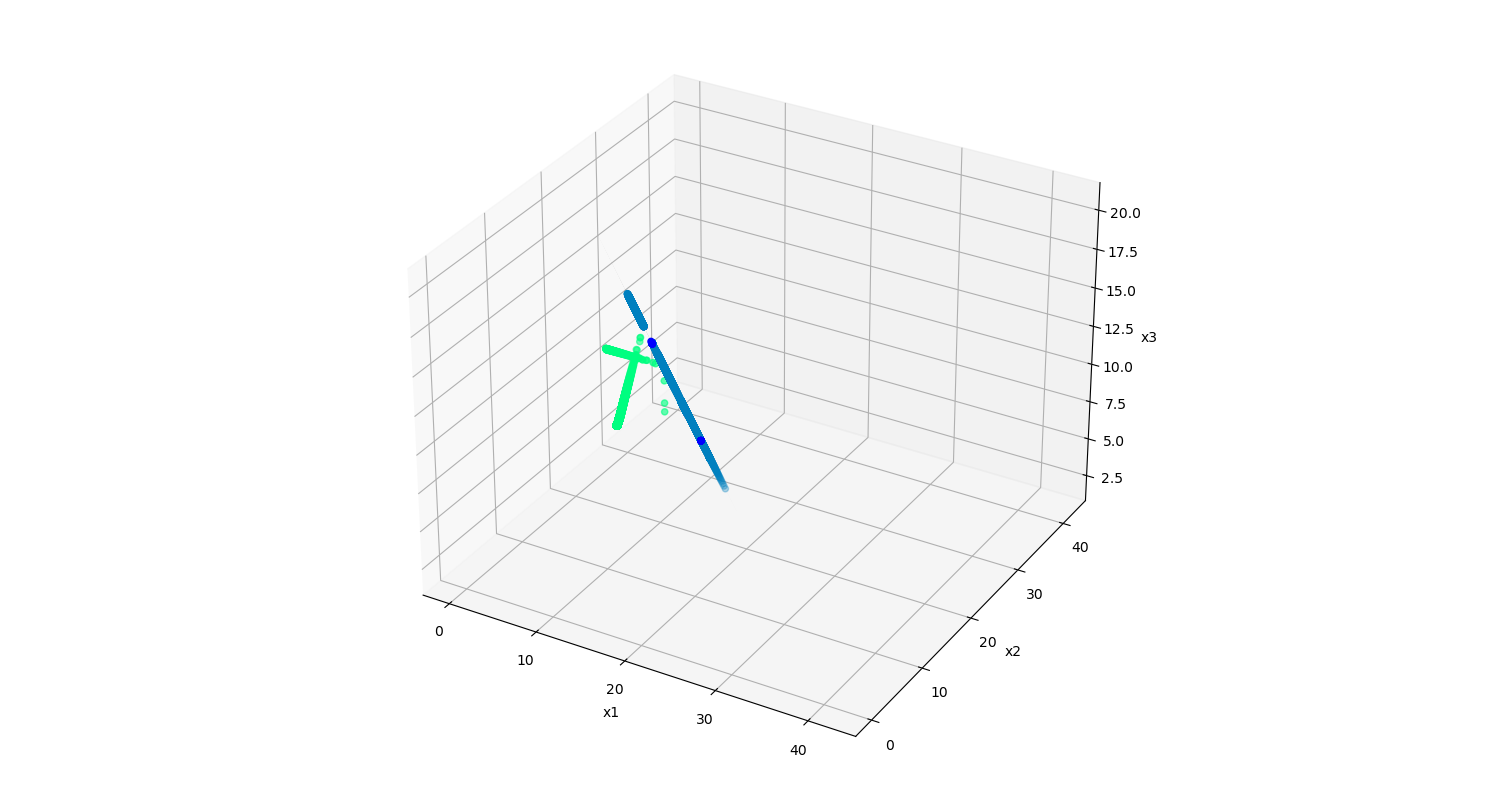

In [ ]:
# 3d plot of the 3 state trajectory
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(np.linspace(0, L_full, 100), np.linspace(0, L_full, 100))
Z = L_full - X - Y
Z[Z < 0] = np.nan  # This will leave out the invalid parts of the surface
Z[X > lbd_spl] = np.nan  # This will leave out the invalid parts of the surface
Z[Y > lbd_spl] = np.nan  # This will leave out the invalid parts of the surface
Z[L_full - X - Y > lbd_spl] = np.nan  # This will leave out the invalid parts of the surface
ax.plot_surface(X, Y, Z, alpha=0.4)
time_slice = np.arange(n_steps)[int(n_steps*0.5):int(n_steps*0.5) + 500000]
cbar = ax.scatter3D(lbd_vect_t[0, time_slice], lbd_vect_t[1, time_slice], lbd_vect_t[2, time_slice], c=[np.sum(lbd_vect_t[:, i] != 0.0) for i in time_slice], cmap='winter')
# cbar = ax.plot3D(lbd_vect_t[0, time_slice], lbd_vect_t[1, time_slice], lbd_vect_t[2, time_slice])
# fig.colorbar(cbar)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.tight_layout()
plt.show()

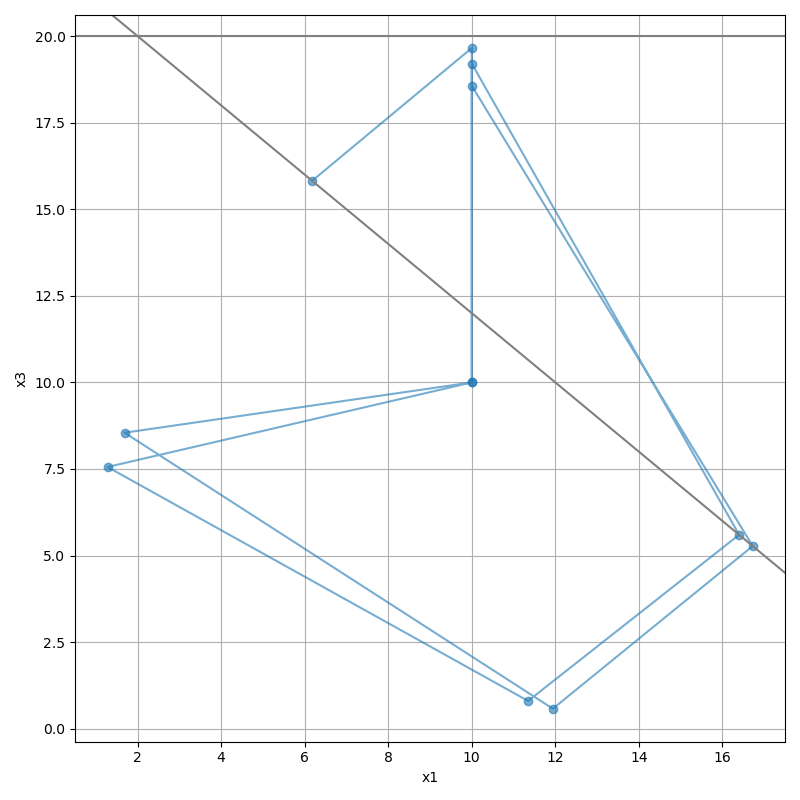

In [ ]:
# project to a 2D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
time_slice = np.arange(12)#np.arange(n_steps)[int(n_steps*0.0):int(n_steps*1.0):1]
colors = np.array([np.sum(lbd_vect_t[:, i] != 0.0) for i in time_slice])

# ax.plot(lbd_vect_t[0, time_slice][colors == 3], lbd_vect_t[2, time_slice][colors == 3], '-o')
ax.plot(lbd_vect_t[0, time_slice], lbd_vect_t[2, time_slice], '-o', alpha=0.6)
# ax.scatter(lbd_vect_t[0, time_slice][colors == 3], lbd_vect_t[2, time_slice][colors == 3])
# ax.scatter(lbd_vect_t[0, time_slice], lbd_vect_t[2, time_slice], c=[np.sum(lbd_vect_t[:, i] != 0.0) for i in time_slice], cmap='winter')
ax.set_xlabel('x1')
ax.set_ylabel('x3')
ax.grid()
# ax.set_aspect('equal')
xlim, ylim = ax.get_xlim(), ax.get_ylim()
ax.plot(np.linspace(0, L_full), L_full - lbd_spl-np.linspace(0, L_full), 'grey')
ax.plot(np.linspace(0, L_full), lbd_spl*np.ones_like(np.linspace(0, L_full)), 'grey')
ax.axvline(lbd_spl, 0, 1, c='grey')
ax.set_xlim(*xlim), ax.set_ylim(*ylim) 
plt.tight_layout()
plt.show()

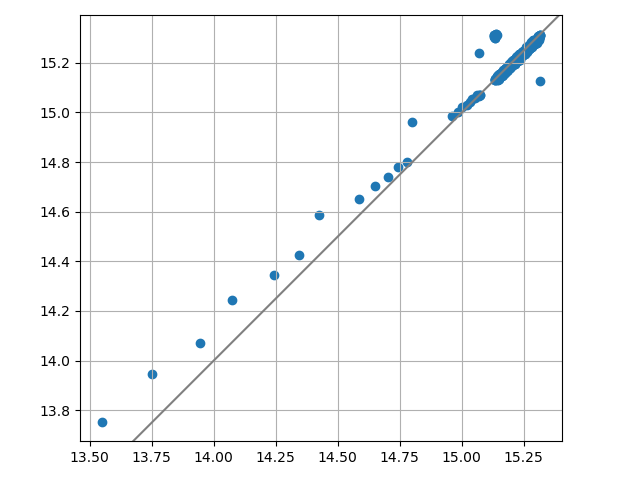

In [ ]:
# poincare
close_inds = np.where(np.isclose(lbd_vect_t[2, :], lbd_spl, atol=0.05))[0]
true_inds = [ind for ind in close_inds if ((lbd_vect_t[2, ind-1] > 0.9 * lbd_spl) and (np.sum(lbd_vect_t[:, i] != 0.0) == 3))]
fig, ax = plt.subplots()
ax.scatter(lbd_vect_t[0, true_inds[:-1]], lbd_vect_t[0, true_inds[1:]])
ax.grid()
ax.set_aspect('equal')
xlim, ylim = ax.get_xlim(), ax.get_ylim()
ax.plot(np.linspace(xlim[0], xlim[1]), np.linspace(xlim[0], xlim[1]), 'grey')
ax.set_xlim(*xlim), ax.set_ylim(*ylim) 
plt.tight_layout()
plt.show()

  0%|          | 0/500 [00:00<?, ?it/s]/usr/lib64/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
100%|██████████| 500/500 [16:34<00:00,  1.99s/it]


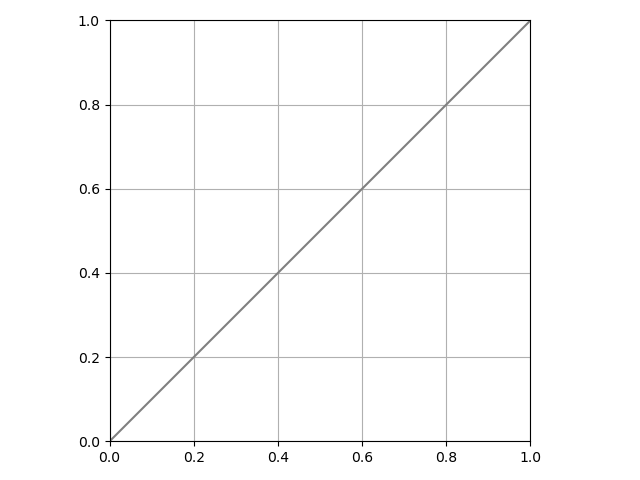

In [ ]:
sig = 10
n_steps = 20000
fig, ax = plt.subplots()
ar = []
for i in tqdm(range(500)):
    try:
        np.random.seed(i+140)
        _, _, _,t_range, lbd_vect_t, adj_matr_t = evolve_adapt_timestep_hard_split(L_full, Drho, Dc, T, epsilon, r, lbd_spl, mu_fact / lbd_spl * L_full / 3, sig, n_steps, dt, Nmax_fact=4, maxiter=6_000, tqdm_bool=False)
        lbd_vect_t = reorder_particles(lbd_vect_t, adj_matr_t, tqdm_bool=False)
        close_inds = np.where(np.isclose(lbd_vect_t[2, :], lbd_spl/2, atol=0.00001))[0]
        # close_inds2 = np.where(np.isclose(lbd_vect_t[0, :], lbd_spl/2, atol=0.00001))[0]
        ar += list(lbd_vect_t[0, close_inds])
        # ax.scatter(lbd_vect_t[0, close_inds[:-1]], lbd_vect_t[0, close_inds[1:]], c='k')
        # ax.scatter(lbd_vect_t[2, close_inds2[:-1]], lbd_vect_t[2, close_inds2[1:]])
    except:
        pass
ax.grid()
ax.set_aspect('equal')
xlim, ylim = ax.get_xlim(), ax.get_ylim()
ax.plot(np.linspace(xlim[0], xlim[1]), np.linspace(xlim[0], xlim[1]), 'grey')
ax.set_xlim(*xlim), ax.set_ylim(*ylim) 
plt.tight_layout()
plt.show()

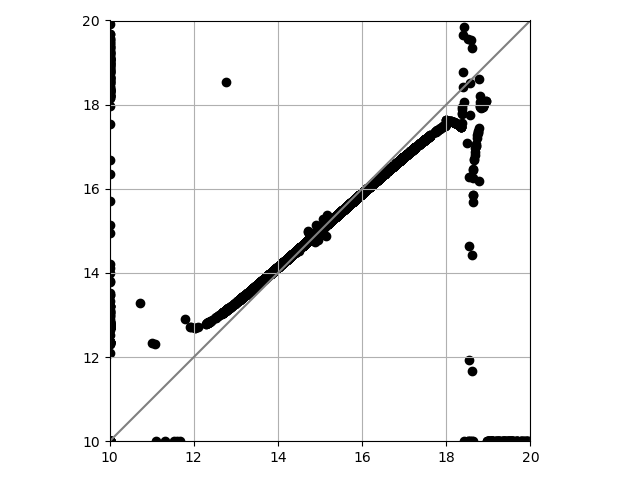

In [ ]:
# poincare better
fig, ax = plt.subplots()
xx = np.array(ar[:-1])
yy = np.array(ar[1:])
mask = ~(np.logical_and(np.abs(xx - 15.0) < 2, np.abs(xx - yy) > 0.3))
ax.scatter(xx[mask], yy[mask], c='k')
ax.grid()
ax.set_aspect('equal')
xlim, ylim = ax.get_xlim(), ax.get_ylim()
ax.plot(np.linspace(xlim[0], xlim[1]), np.linspace(xlim[0], xlim[1]), 'grey')
ax.set_xlim(*xlim), ax.set_ylim(*ylim) 
ax.set_xlim(10, 20), ax.set_ylim(10, 20) 
plt.tight_layout()
plt.show()

In [21]:
n_steps = 10000
dt = 1e-2
ind_current_lo = 1213
ind_current_hi = 1514
t_range = np.arange(0, dt * n_steps, dt)
[0.0] + dt * np.arange(0, 2, dtype=float)

array([0.  , 0.01])

In [ ]:
a = [np.arange(4)]*2
a.append(np.arr[np.arange(4)]*3)
print(a)

TypeError: list.append() takes exactly one argument (3 given)